# Load the data and libraries

In [1]:
%load_ext jupyter_black

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"] = (11, 7)
pd.set_option("display.max_columns", 20)

In [2]:
students = pd.read_parquet("../data/splits/train.parquet")

In [13]:
students.head()

,marital_status,application_mode,application_order,course,day_evening,previous_education,nationality,mother_education,father_education,mother_occupation,...,second_sem_credited,second_sem_enrolled,second_sem_evaluations,second_sem_approved,second_sem_grade,second_sem_without_evaluations,unemployment_rate,inflation_rate,gdp_change,dropout
0,Single,1st phase - general contingent,1,Management,daytime,Secondary Education,Portuguese,Tertiary course,Basic education 1st cycle,Unskilled,...,0,5,5,1,12.000000,0,7.6,2.6,0.32,1
1,Single,1st phase - general contingent,1,Basic Education,daytime,Secondary Education,Portuguese,Tertiary course,Basic education 1st cycle,Skilled,...,0,6,10,4,11.500000,0,7.6,2.6,0.32,1
2,Married,Over 23 years old,1,Management,evening,Secondary Education,Portuguese,Tertiary course,Basic education 1st cycle,Unskilled,...,0,5,9,2,11.000000,0,12.7,3.7,-1.70,1
3,Single,2nd phase - general contingent,2,Advertising and Marketing Management,daytime,Secondary Education,Portuguese,Tertiary course,Basic Education 3rd Cycle,"Personal Services, Security and Safety Workers...",...,0,6,10,5,13.125000,0,10.8,1.4,1.74,1
4,Single,1st phase - general contingent,3,Veterinary Nursing,daytime,Secondary Education,Portuguese,Secondary Education,Secondary Education,Administrative,...,0,6,12,6,13.833333,0,8.9,1.4,3.51,0


# Analysis of missing values and descriptive statistics

In [14]:
# No missing values in the data
students.isnull().sum().to_frame("Missing values counts")

,Missing values counts
marital_status,0
application_mode,0
application_order,0
course,0
day_evening,0
previous_education,0
nationality,0
mother_education,0
father_education,0
mother_occupation,0


In [6]:
students.dtypes

marital_status                      object
application_mode                    object
application_order                    int64
course                              object
day_evening                         object
previous_education                  object
nationality                         object
mother_education                  category
father_education                  category
mother_occupation                   object
father_occupation                   object
displaced                           object
special_needs                       object
debtor                              object
tuition_fees_up_to_date             object
gender                              object
scholarship_holder                  object
age_at_enrollment                    int64
international                       object
first_sem_credited                   int64
first_sem_enrolled                   int64
first_sem_evaluations                int64
first_sem_approved                   int64
first_sem_g

In [7]:
students.describe().T

,count,mean,std,min,25%,50%,75%,max
application_order,3539.0,1.727042,1.307274,0.00,1.000,1.00,2.000000,9.000000
age_at_enrollment,3539.0,23.249506,7.605164,17.00,19.000,20.00,25.000000,70.000000
first_sem_credited,3539.0,0.717152,2.379597,0.00,0.000,0.00,0.000000,20.000000
first_sem_enrolled,3539.0,6.265329,2.494418,0.00,5.000,6.00,7.000000,26.000000
first_sem_evaluations,3539.0,8.291325,4.187610,0.00,6.000,8.00,10.000000,45.000000
first_sem_approved,3539.0,4.701611,3.095471,0.00,3.000,5.00,6.000000,26.000000
first_sem_grade,3539.0,10.622981,4.871221,0.00,11.000,12.32,13.399000,18.875000
first_sem_without_evaluations,3539.0,0.139870,0.663121,0.00,0.000,0.00,0.000000,12.000000
second_sem_credited,3539.0,0.545352,1.923602,0.00,0.000,0.00,0.000000,19.000000
second_sem_enrolled,3539.0,6.226900,2.219626,0.00,5.000,6.00,7.000000,23.000000


# Target variable analysis

In [8]:
target_map = {0: "Not Dropout", 1: "Dropout"}
target_palette = {"Not Dropout": "#4ECDC4", "Dropout": "#FF6B6B"}

students["target"] = students["dropout"].map(target_map).astype("category")

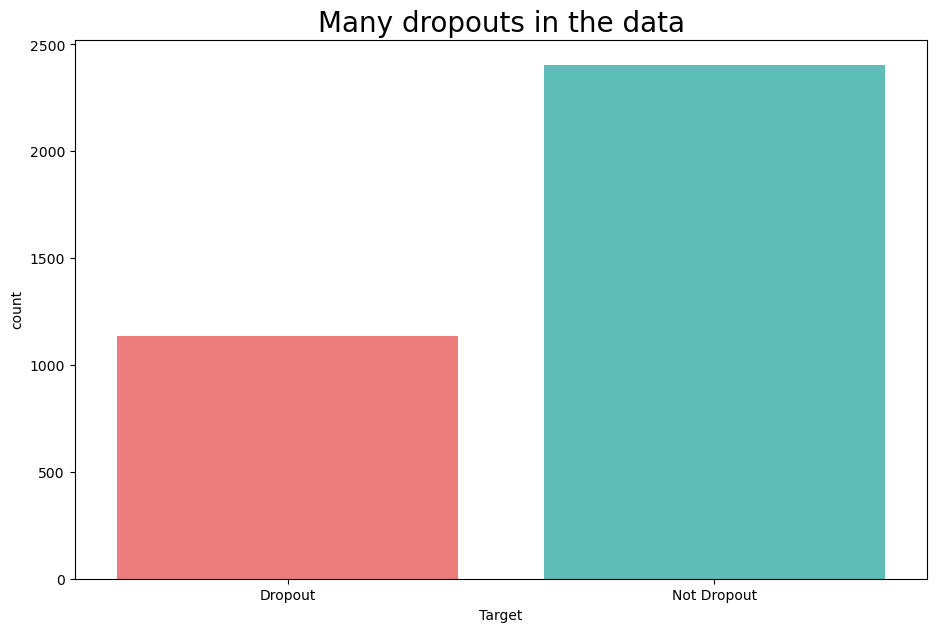

In [17]:
sns.countplot(students, x="target", palette=target_palette)
plt.title("Many dropouts in the data", fontsize=20)
plt.xlabel("Target")
plt.show()

In [9]:
students.target.value_counts(sort=False, normalize=True).to_frame(
    "Target Distribution"
).style.format("{:.2%}")

,Target Distribution
Dropout,32.13%
Not Dropout,67.87%


Almost 1/3 of the total students dropout of the higher education institution.

# Univariate analysis (relation with target)

In [5]:
def plot_proportions(data, var, size=(13, 6)):
    """Function to plot a categorical variable distribution related to the target"""
    var_title = var.replace("_", " ").title()
    data_filter = data.groupby(var, as_index=False)["target"].value_counts()
    data_filter["proportion"] = data_filter.groupby(var)["count"].transform(
        lambda x: x / sum(x)
    )
    y_order = (
        data_filter.query("target == 'Not Dropout'")
        .sort_values("proportion", ascending=False)[var]
        .values
    )
    return (
        so.Plot(data_filter, y=var, color="target")
        .pair(x=["proportion", "count"])
        .layout(size=size, engine="tight")
        .add(so.Bar(), so.Dodge())
        .scale(
            color=so.Nominal(
                order=data_filter.target.cat.categories.values[::-1],
                values=target_palette,
            ),
            y=so.Nominal(order=y_order),
            x0=so.Continuous().label(like="{x:.0%}"),
        )
        .label(
            y=var_title, x0=lambda x: x.title(), x1=lambda x: x.title(), color="Target"
        )
        .theme({**axes_style("white")})
    )

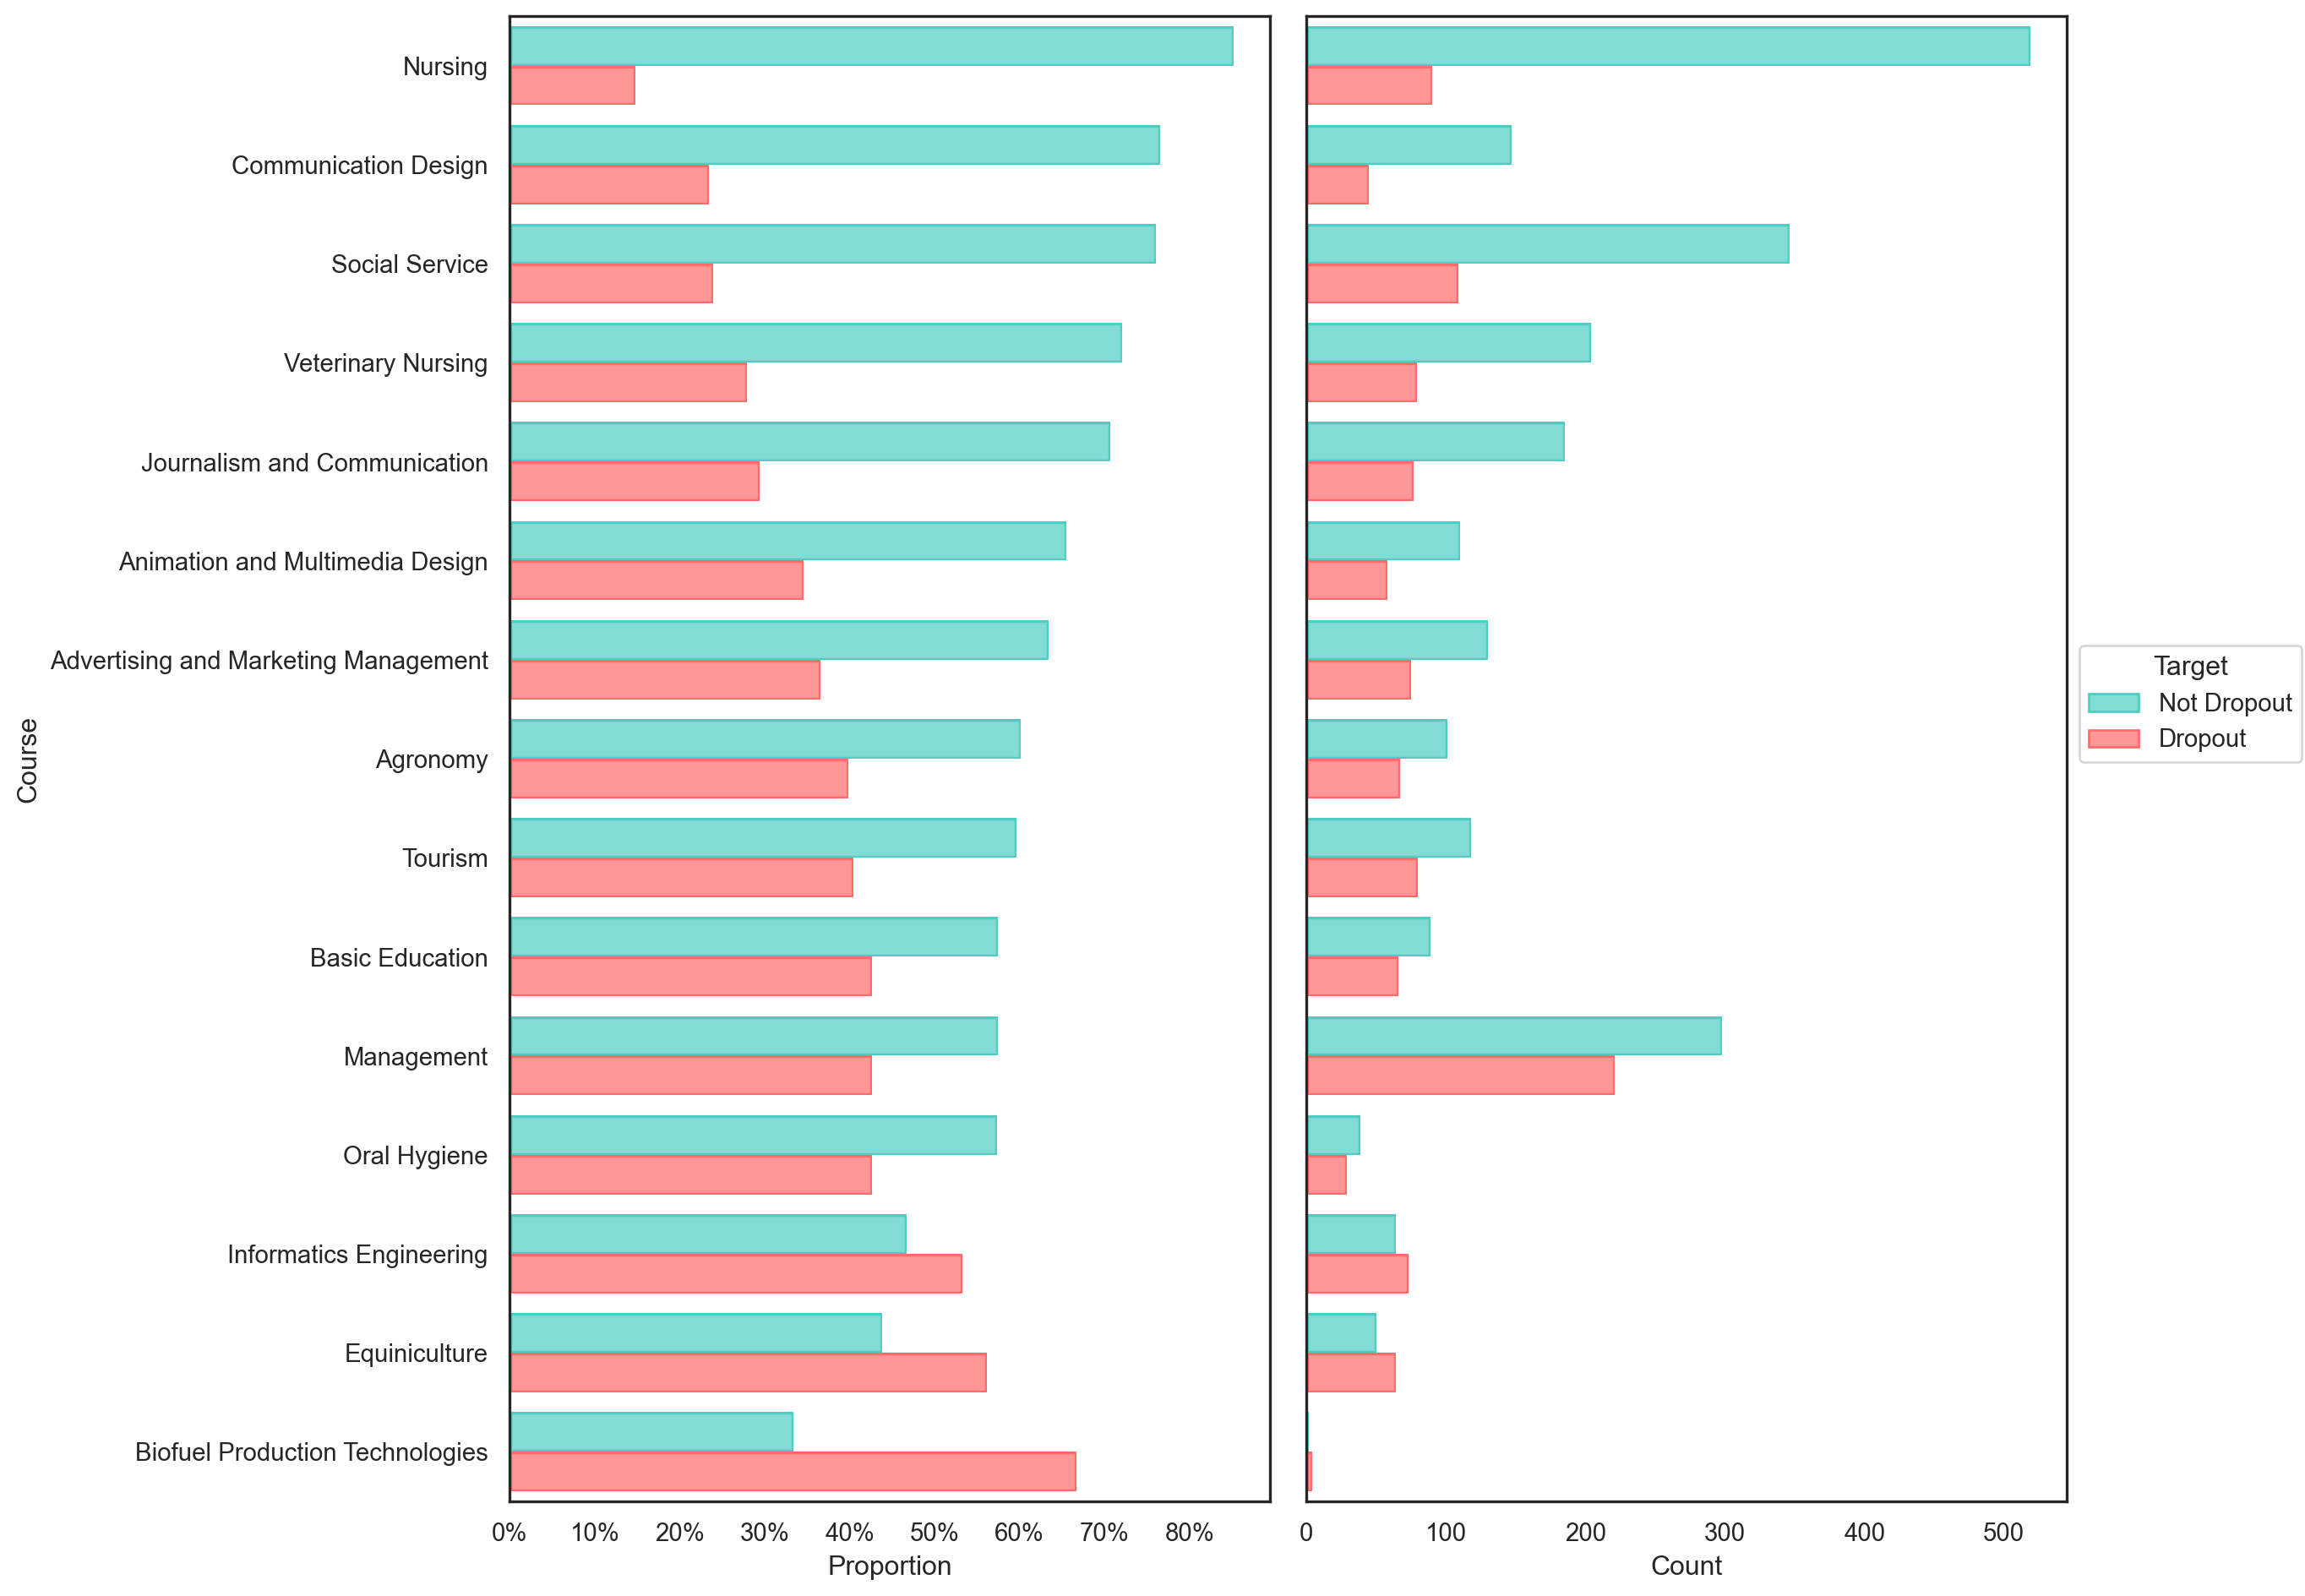

In [23]:
students.pipe(plot_proportions, "course", (13, 10))

The course have a strong correlation with graduation rate. In the nursing course, only 15% of the total students graduate, while in Biofuel Production Technologies course that number rises to 66%

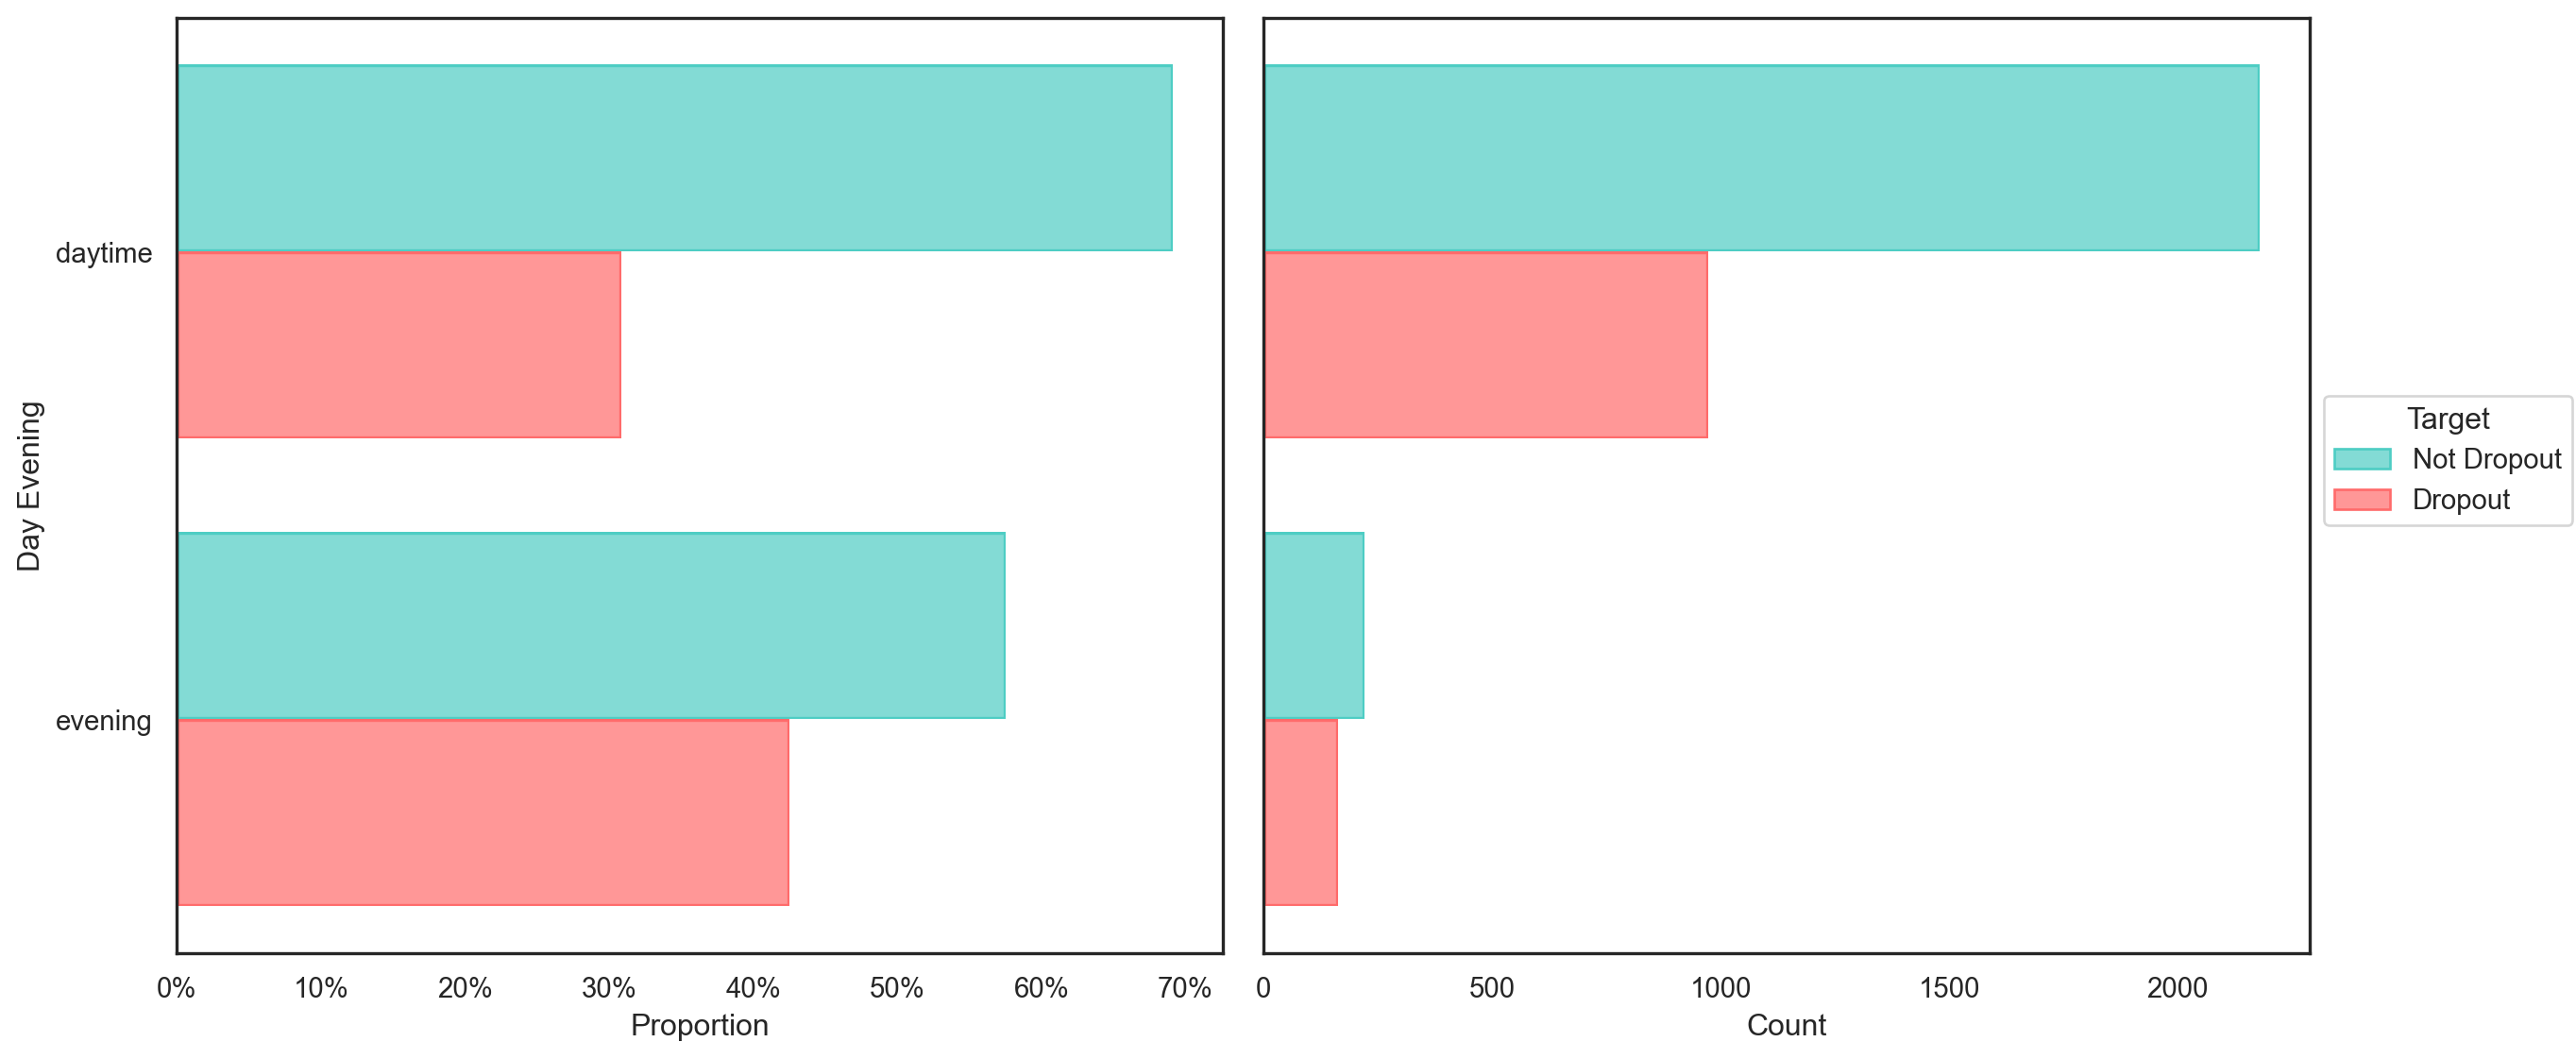

In [26]:
students.pipe(plot_proportions, "day_evening")

Evening students are more likely to dropout than evening students, although there are less students in the evening courses. 

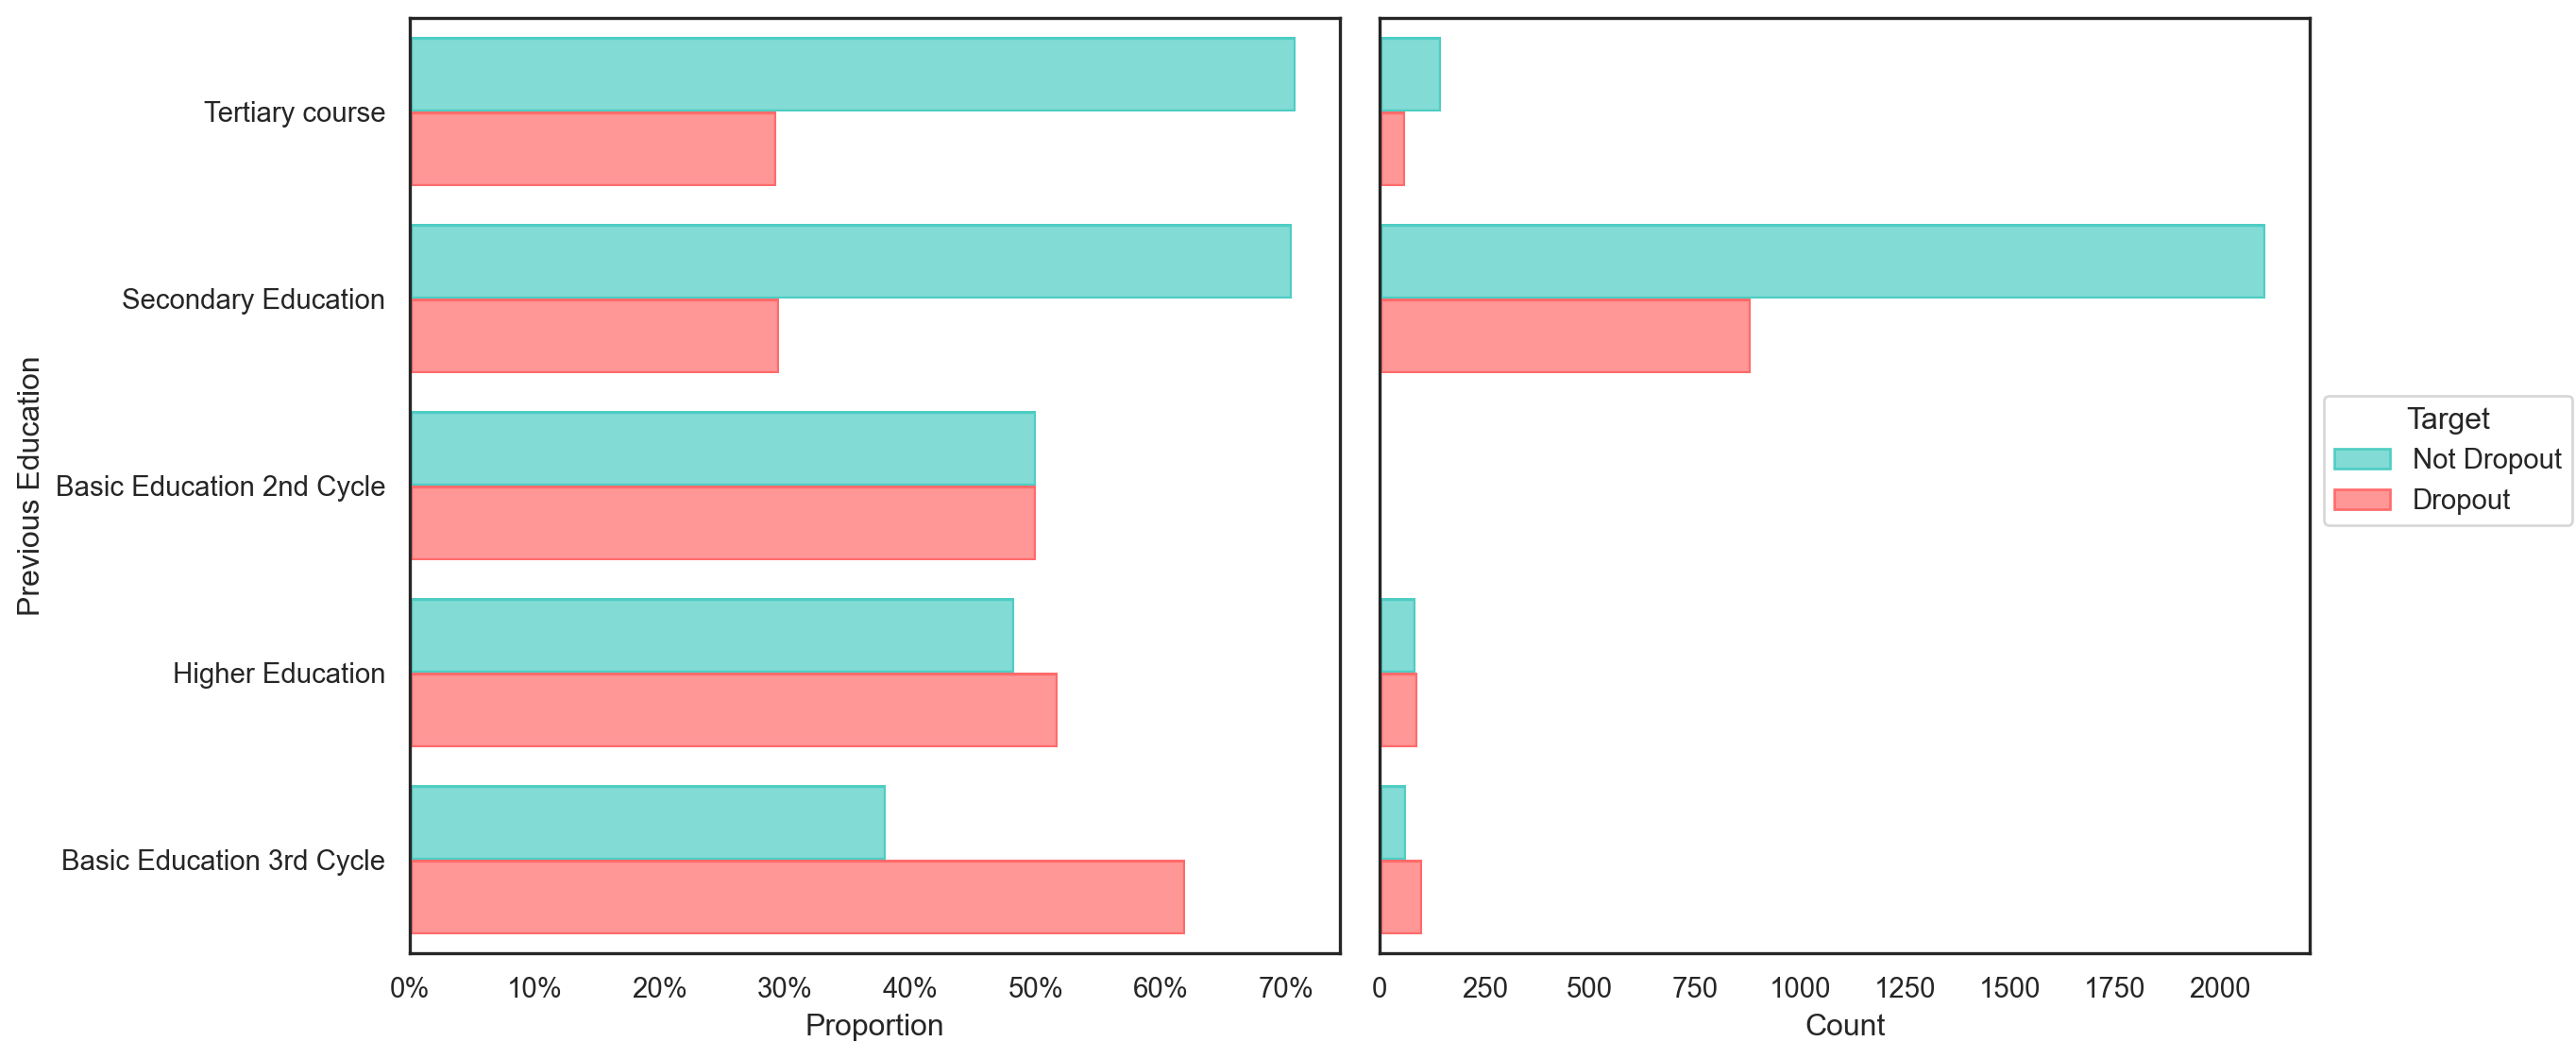

In [10]:
students.pipe(plot_proportions, "previous_education")

Most of the students have a secondary education degree, so there is not a lot of data in the other categories, but the dropout rates in this rare categories is really high (~ 60%). Is it by chance or this could be a good predictor?

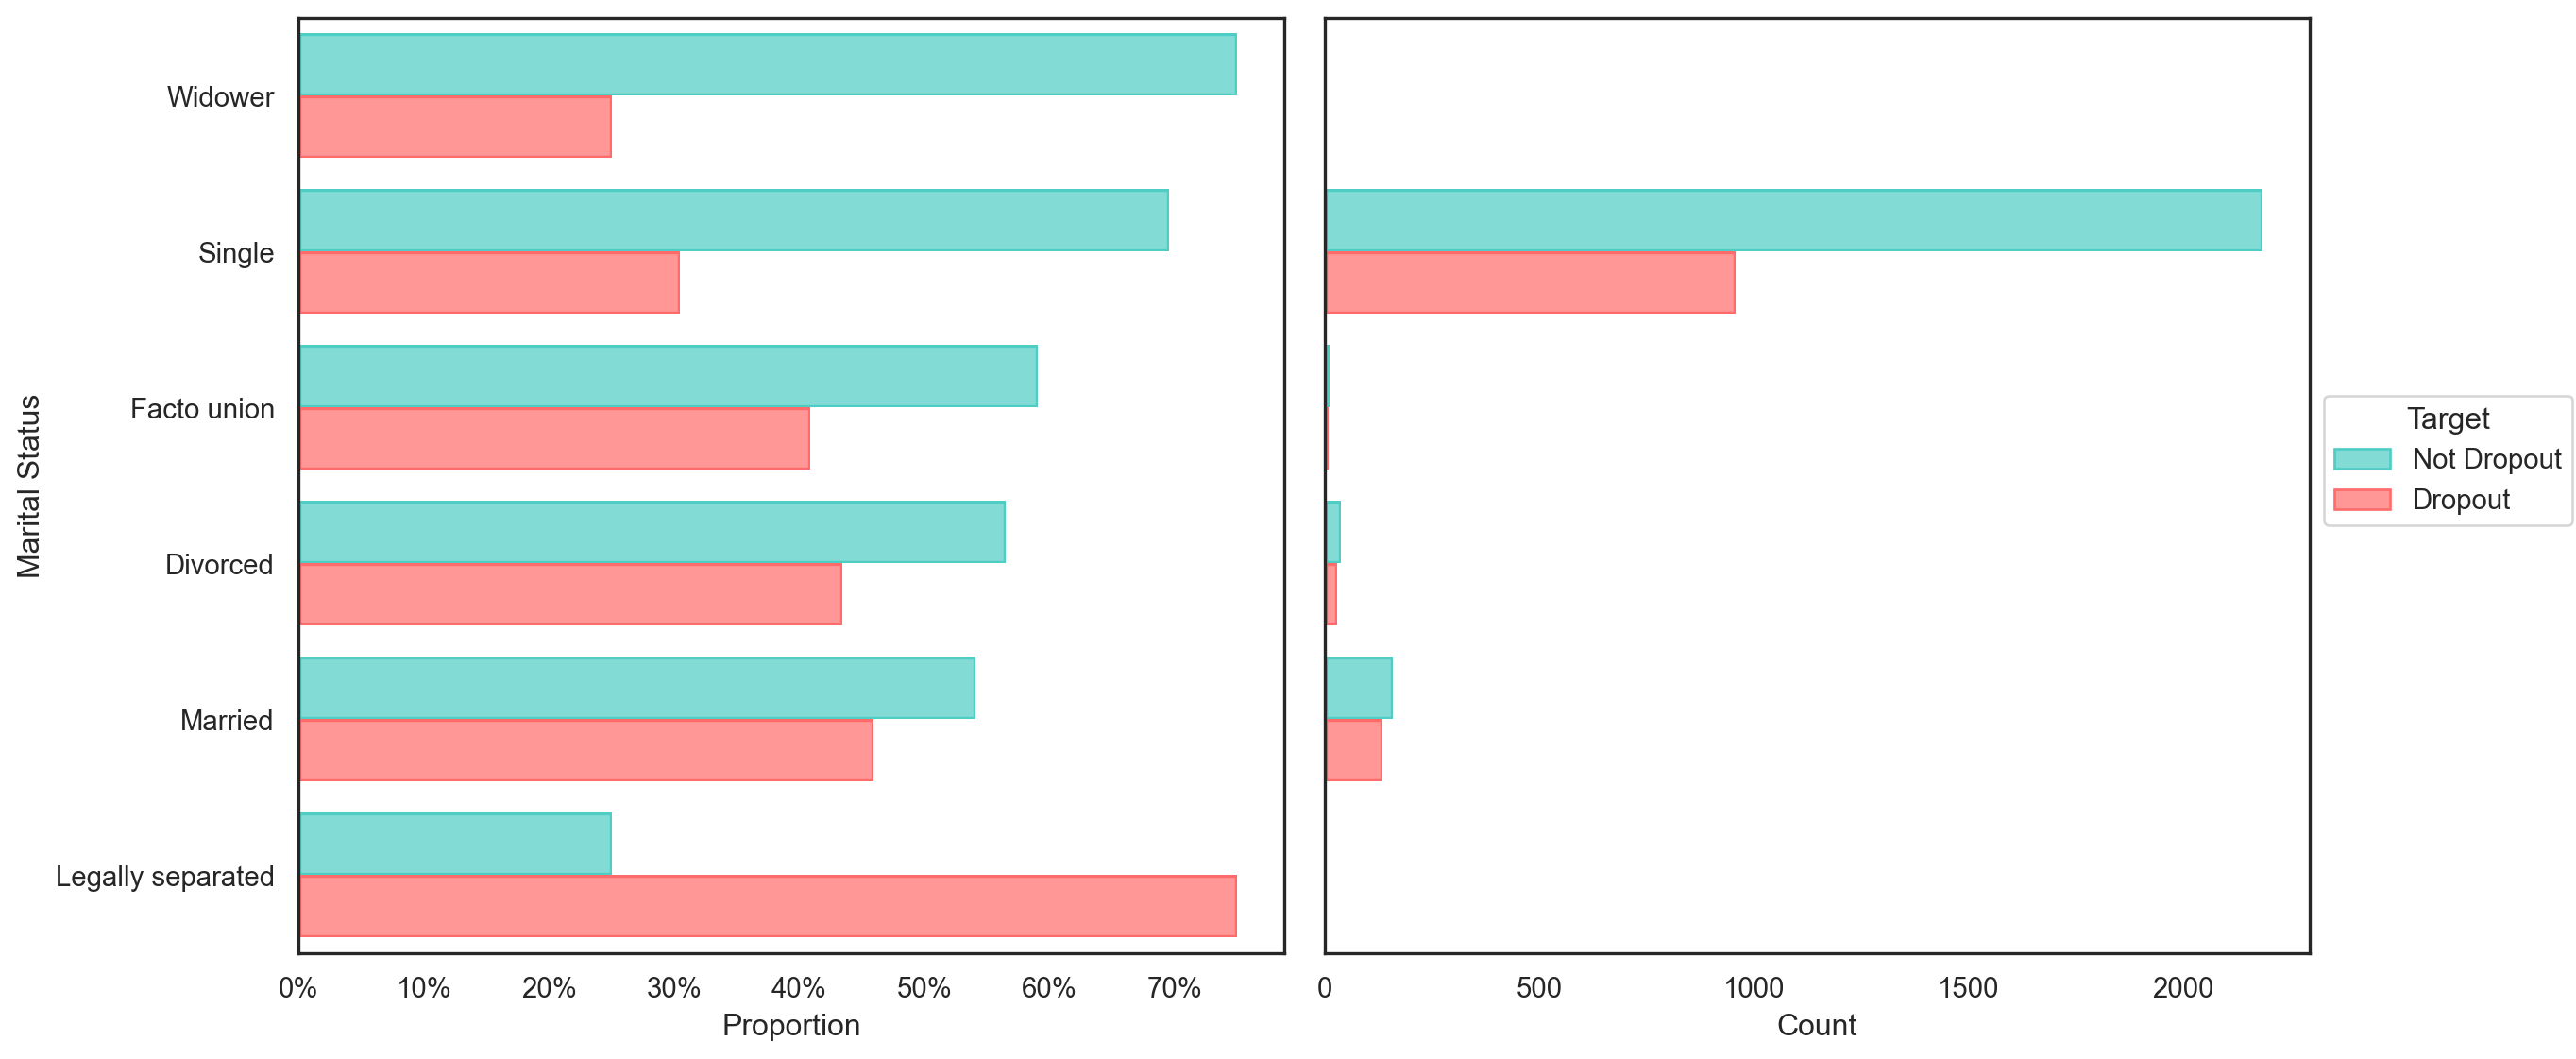

In [28]:
students.pipe(plot_proportions, "marital_status")

The big majority of the students are single (88% of the total), so this is probably not a good predictor due to it's low variance

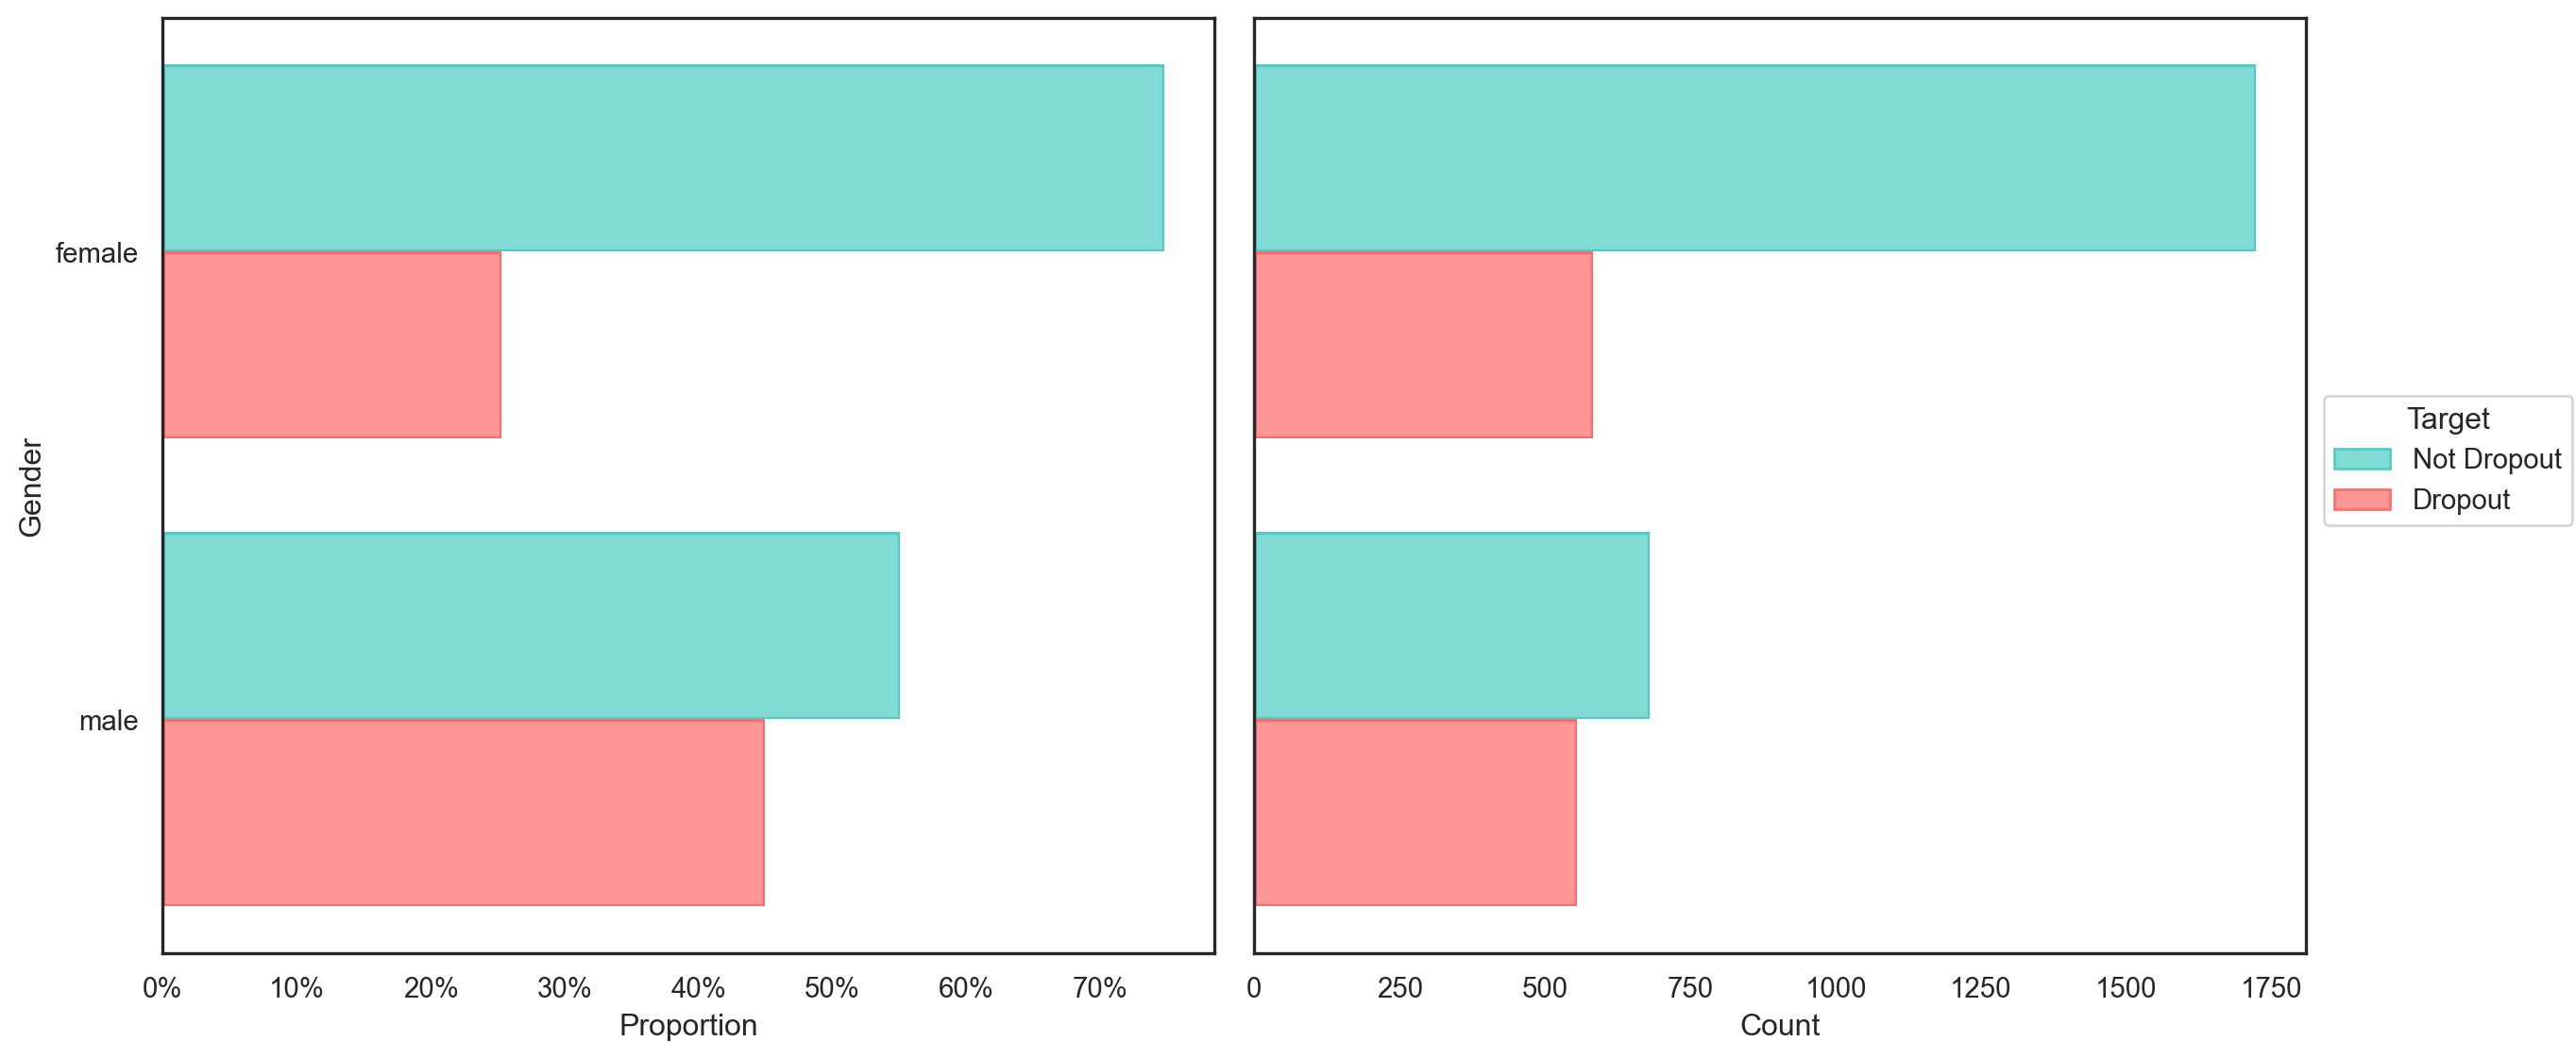

In [31]:
students.pipe(plot_proportions, "gender")

In [32]:
students.groupby("gender")["dropout"].mean()

gender
female    0.252604
male      0.449393
Name: dropout, dtype: float64

Big difference between men and women in graduations rate. Almost 45% of the men dropout whilst only 25% of the women do. Is this a gender capacity difference? Are women more studious than men? Or is there another [confounding variable](https://en.wikipedia.org/wiki/Confounding) affecting the outcome? For instance, in STEM (Science, technology, engineering, and mathematics) courses the majority of the students are men, and we have seen that these courses have the major dropout rates in contrast to social disciplines. I will analyze this deeper later.

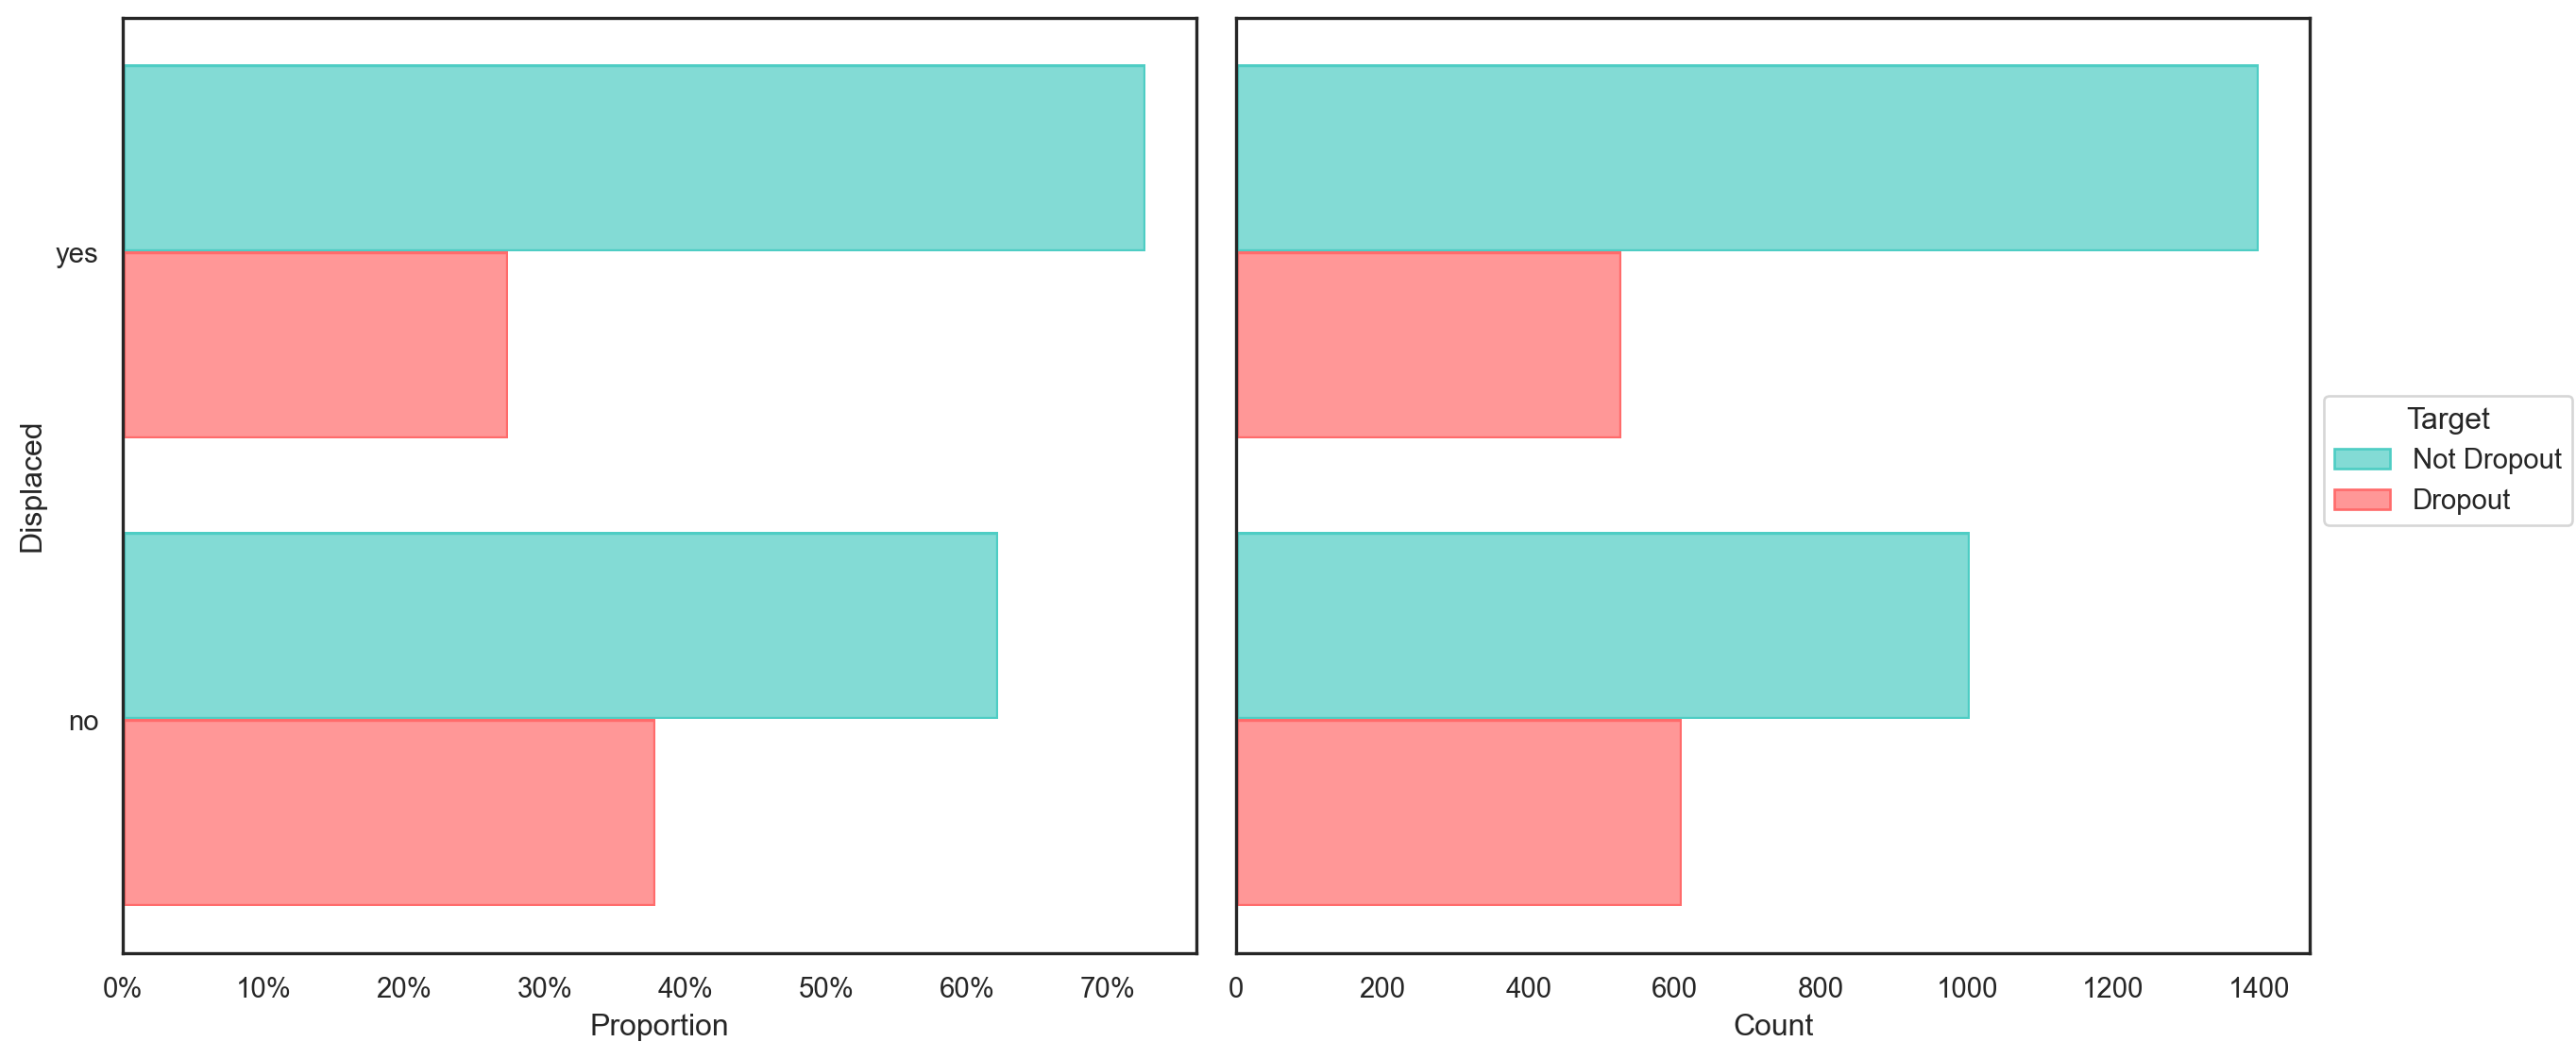

In [43]:
students.pipe(plot_proportions, "displaced")

Those who don't displace are more likely to dropout

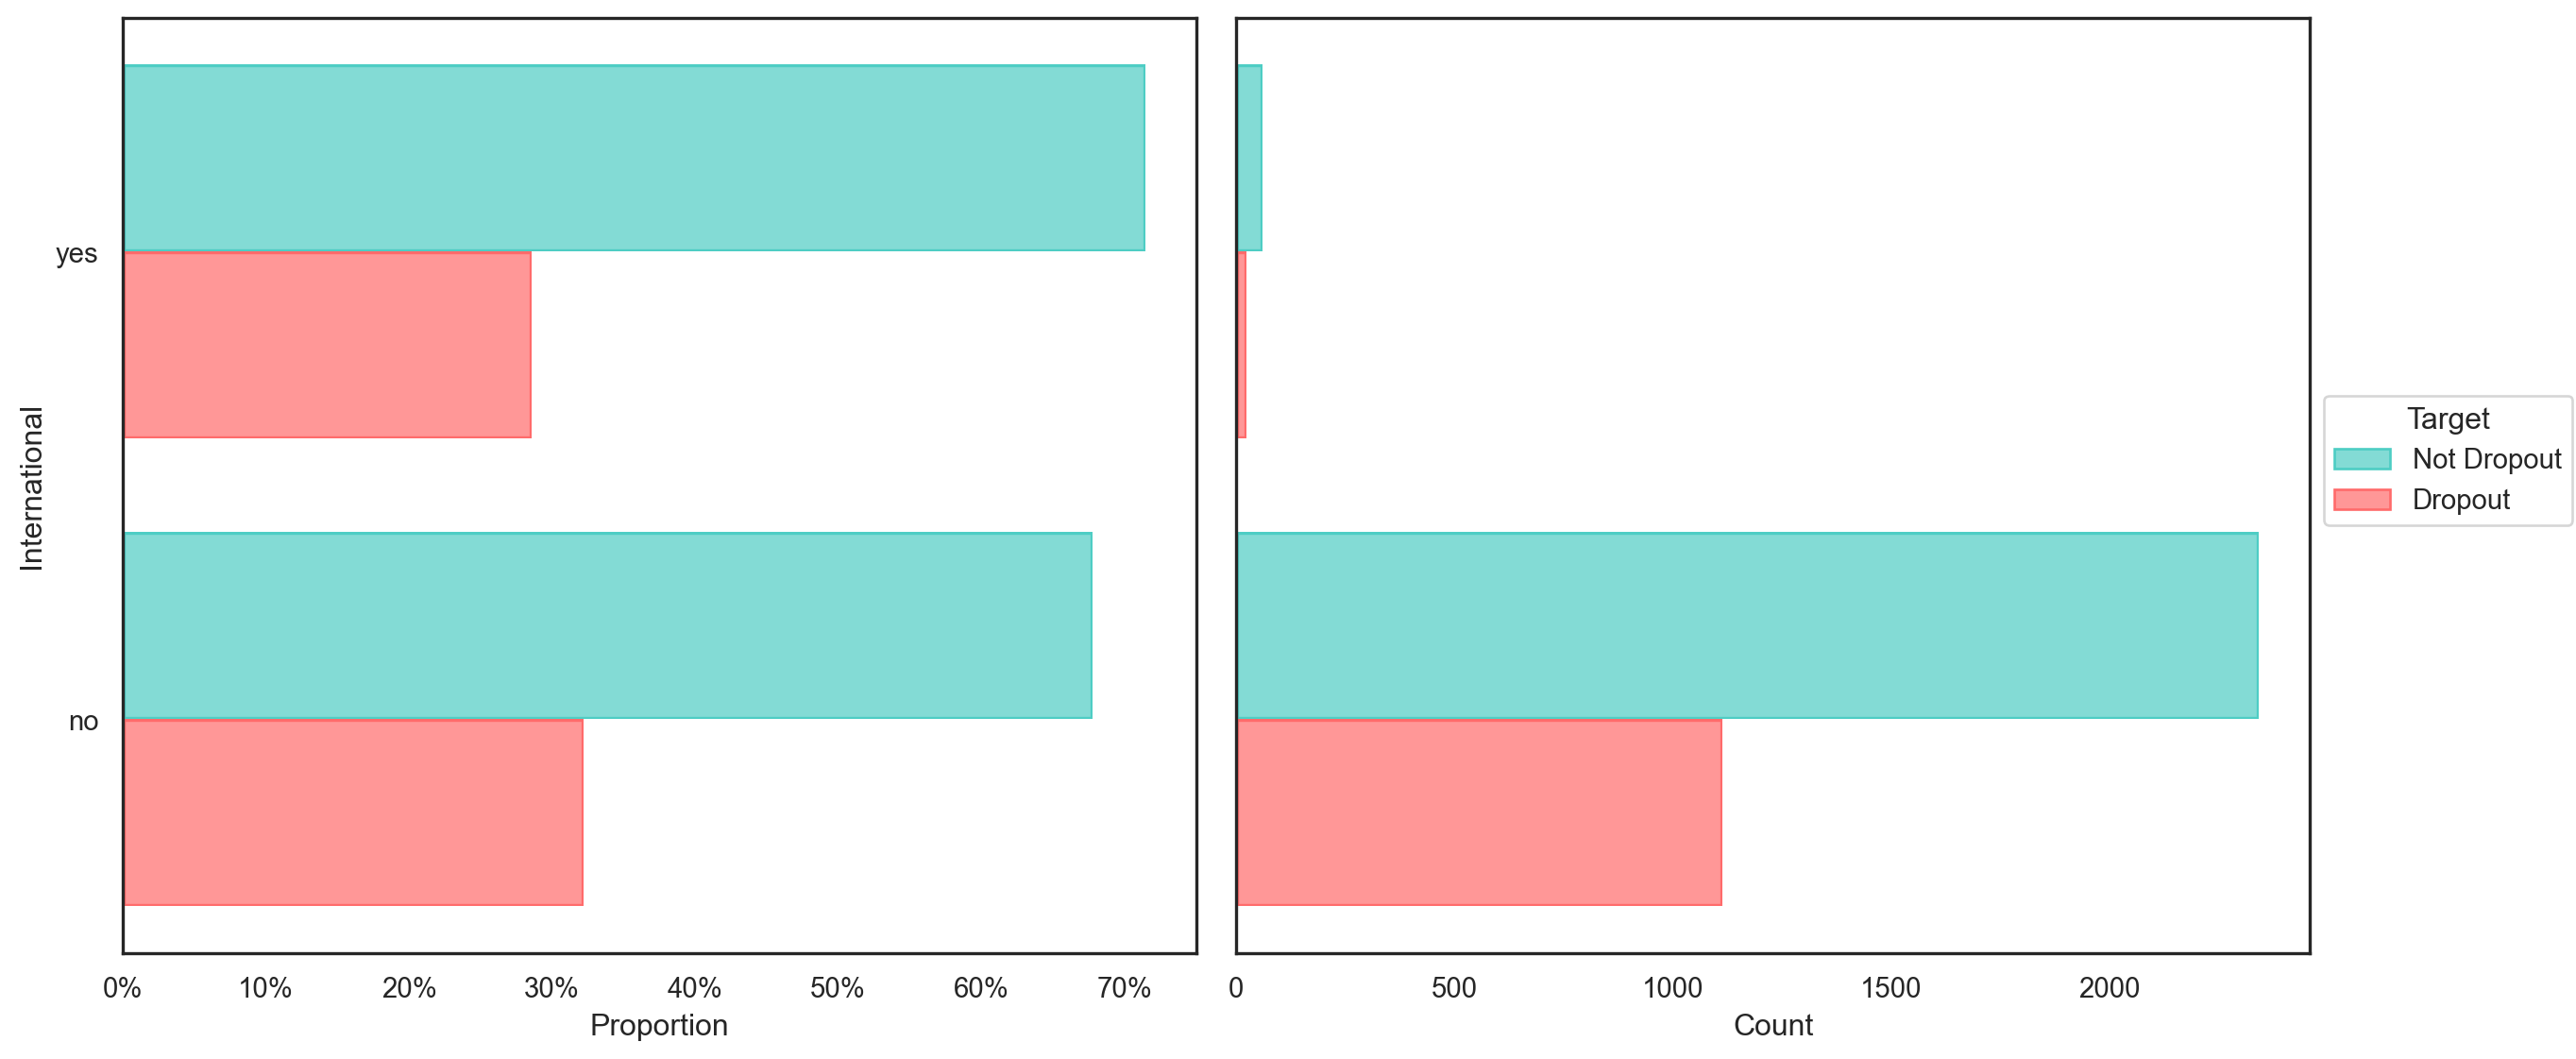

In [44]:
students.pipe(plot_proportions, "international")

In [16]:
students.value_counts("international", normalize=True)

international
no     0.975136
yes    0.024864
dtype: float64

International students only account for 2.5% of the total data, the proportion within each group seems to be the same, that's why this one is probably not a good predictor.

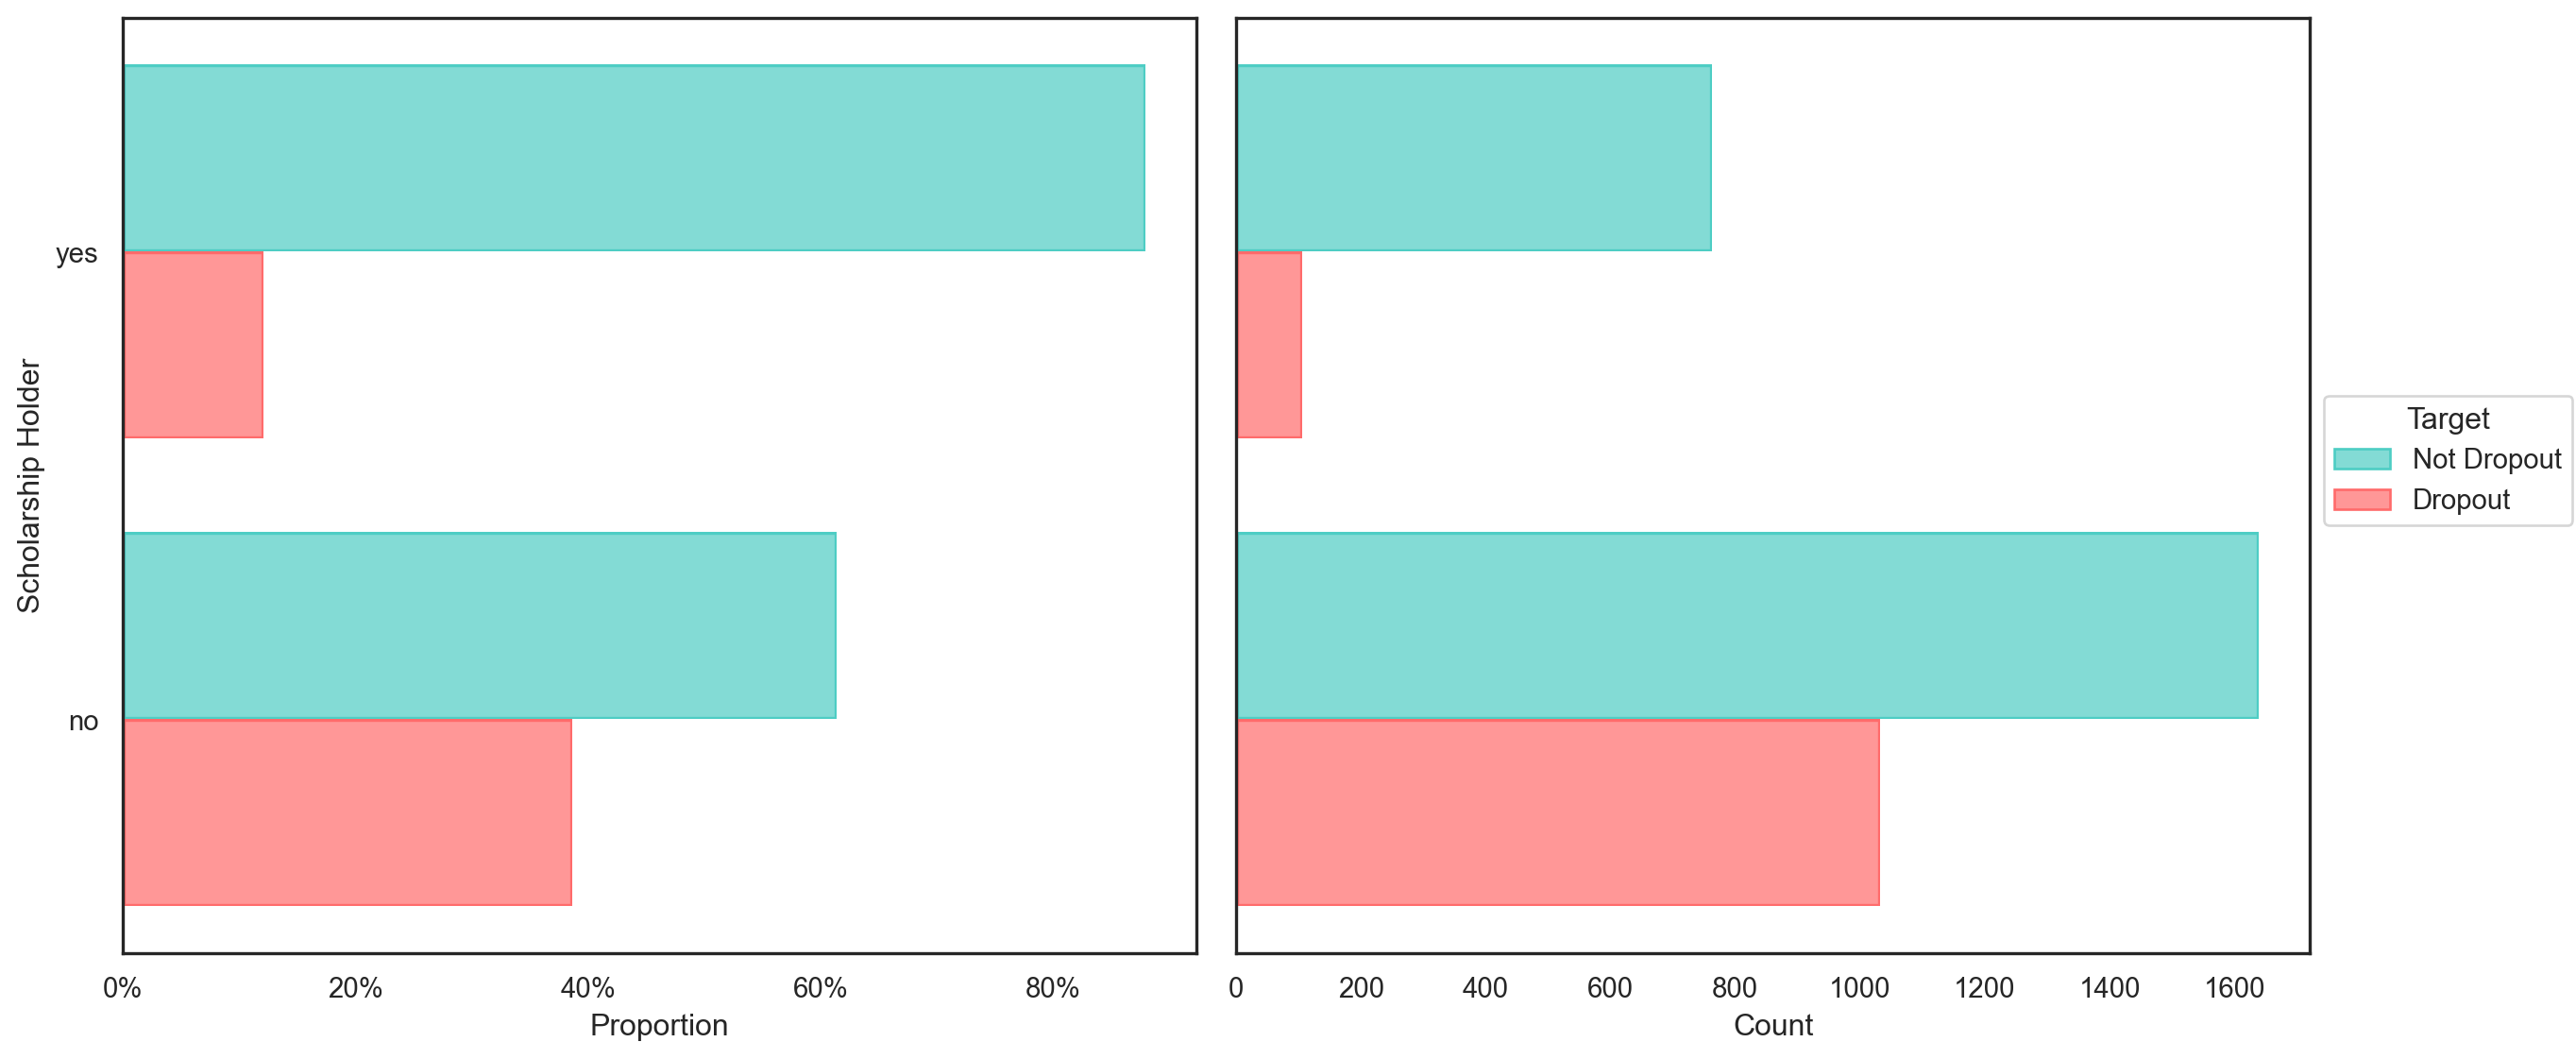

In [45]:
students.pipe(plot_proportions, "scholarship_holder")

Wow, looks like scholarships are a great predictor of graduation, but correlation is not causation. Are scholarships making students more likely to graduate or is it that students that get scholarships are those with better grades and that is causing the higher graduation rate? I will dig up into this subject later

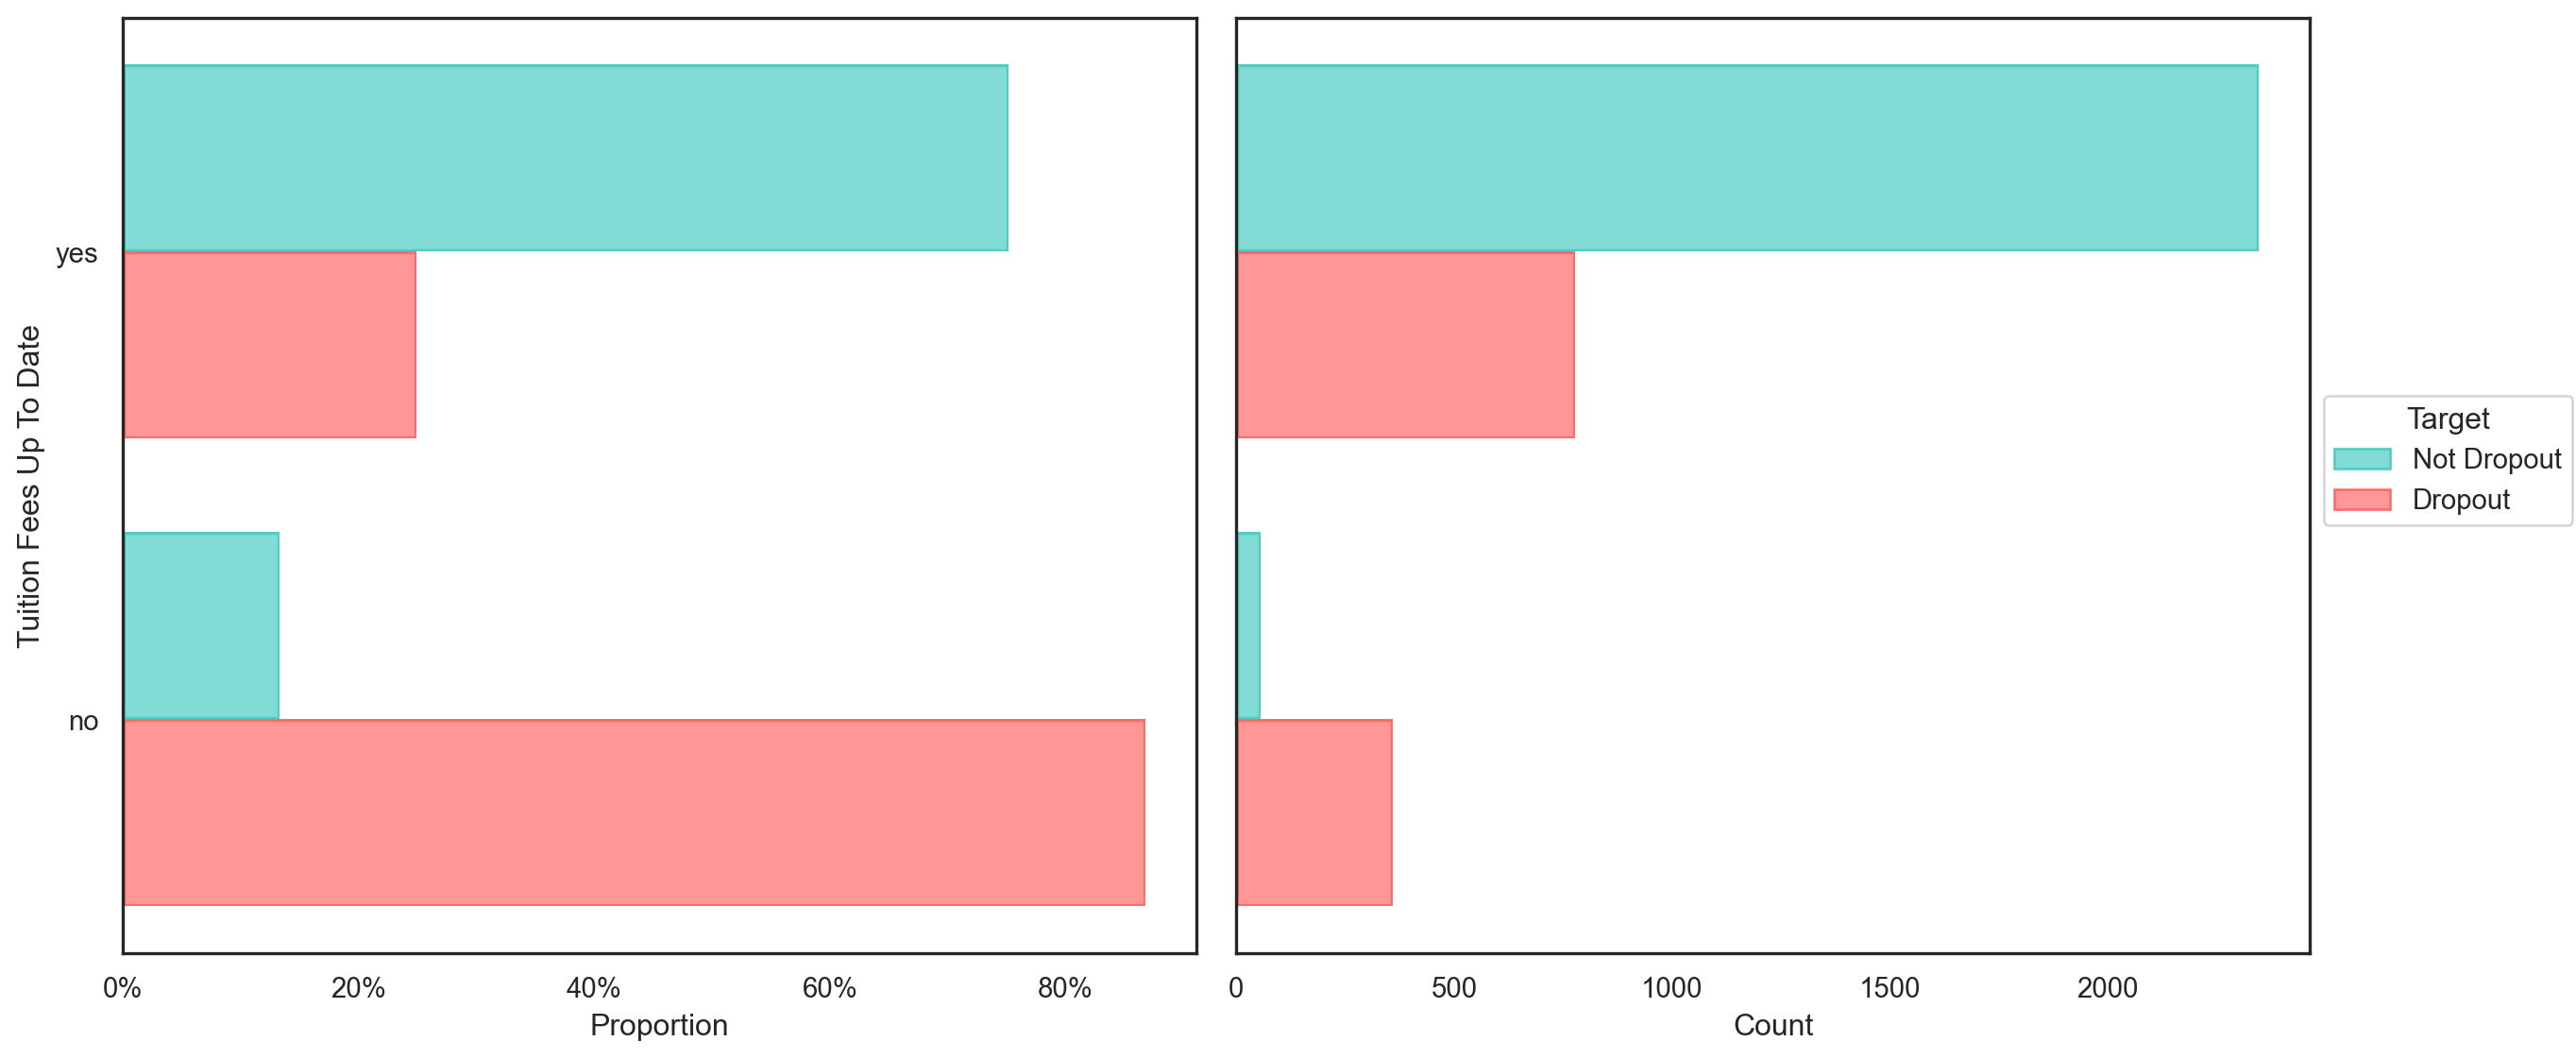

In [46]:
students.pipe(plot_proportions, "tuition_fees_up_to_date")

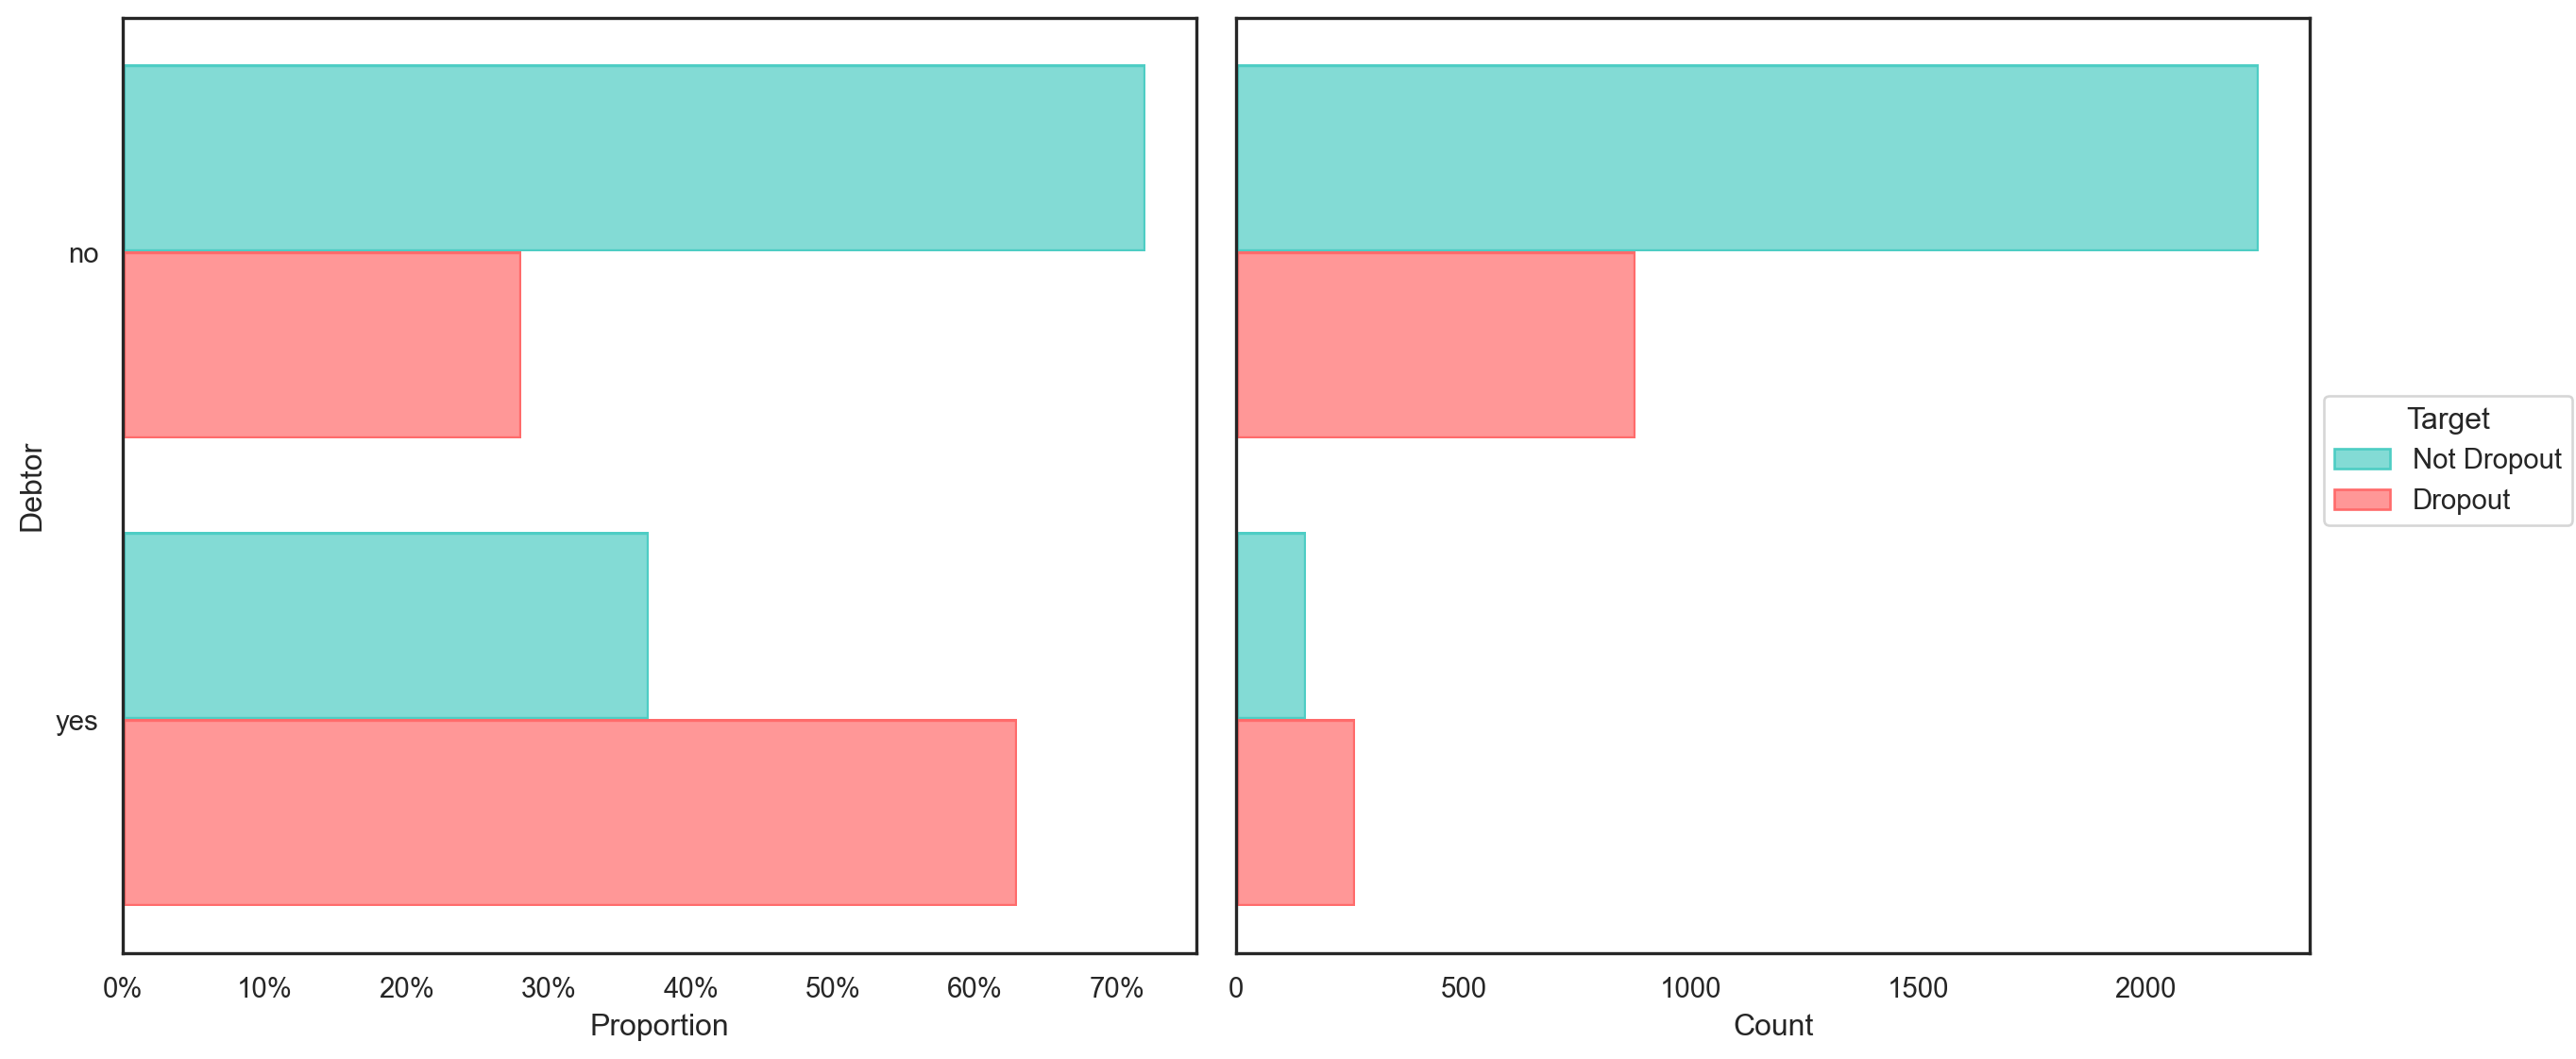

In [47]:
students.pipe(plot_proportions, "debtor")

Probably "tuition fees up to date" and "debtor" are correlated, since both should be measuring a similar variable

In [48]:
pd.crosstab(
    students.debtor, students.tuition_fees_up_to_date
).style.background_gradient(axis=None, cmap="Purples")

tuition_fees_up_to_date,no,yes
debtor,,
no,214,2912
yes,200,213


Those who don't have their tuition fee up to date and/or are debtors are really likely of dropout, even though these two variables are not highly correlated. As seen in the last table, most students (82%) are not debtors and have their tuition up to date, the rest of them are almost equally divided between the other categories. This makes sense, once you know you will leave, you stop paying. Probably this is a great indicator for the university, those who stop paying their tuition and/or are debtors are really likely to dropout. In these cases, they might want to follow up those cases and check what is happening.

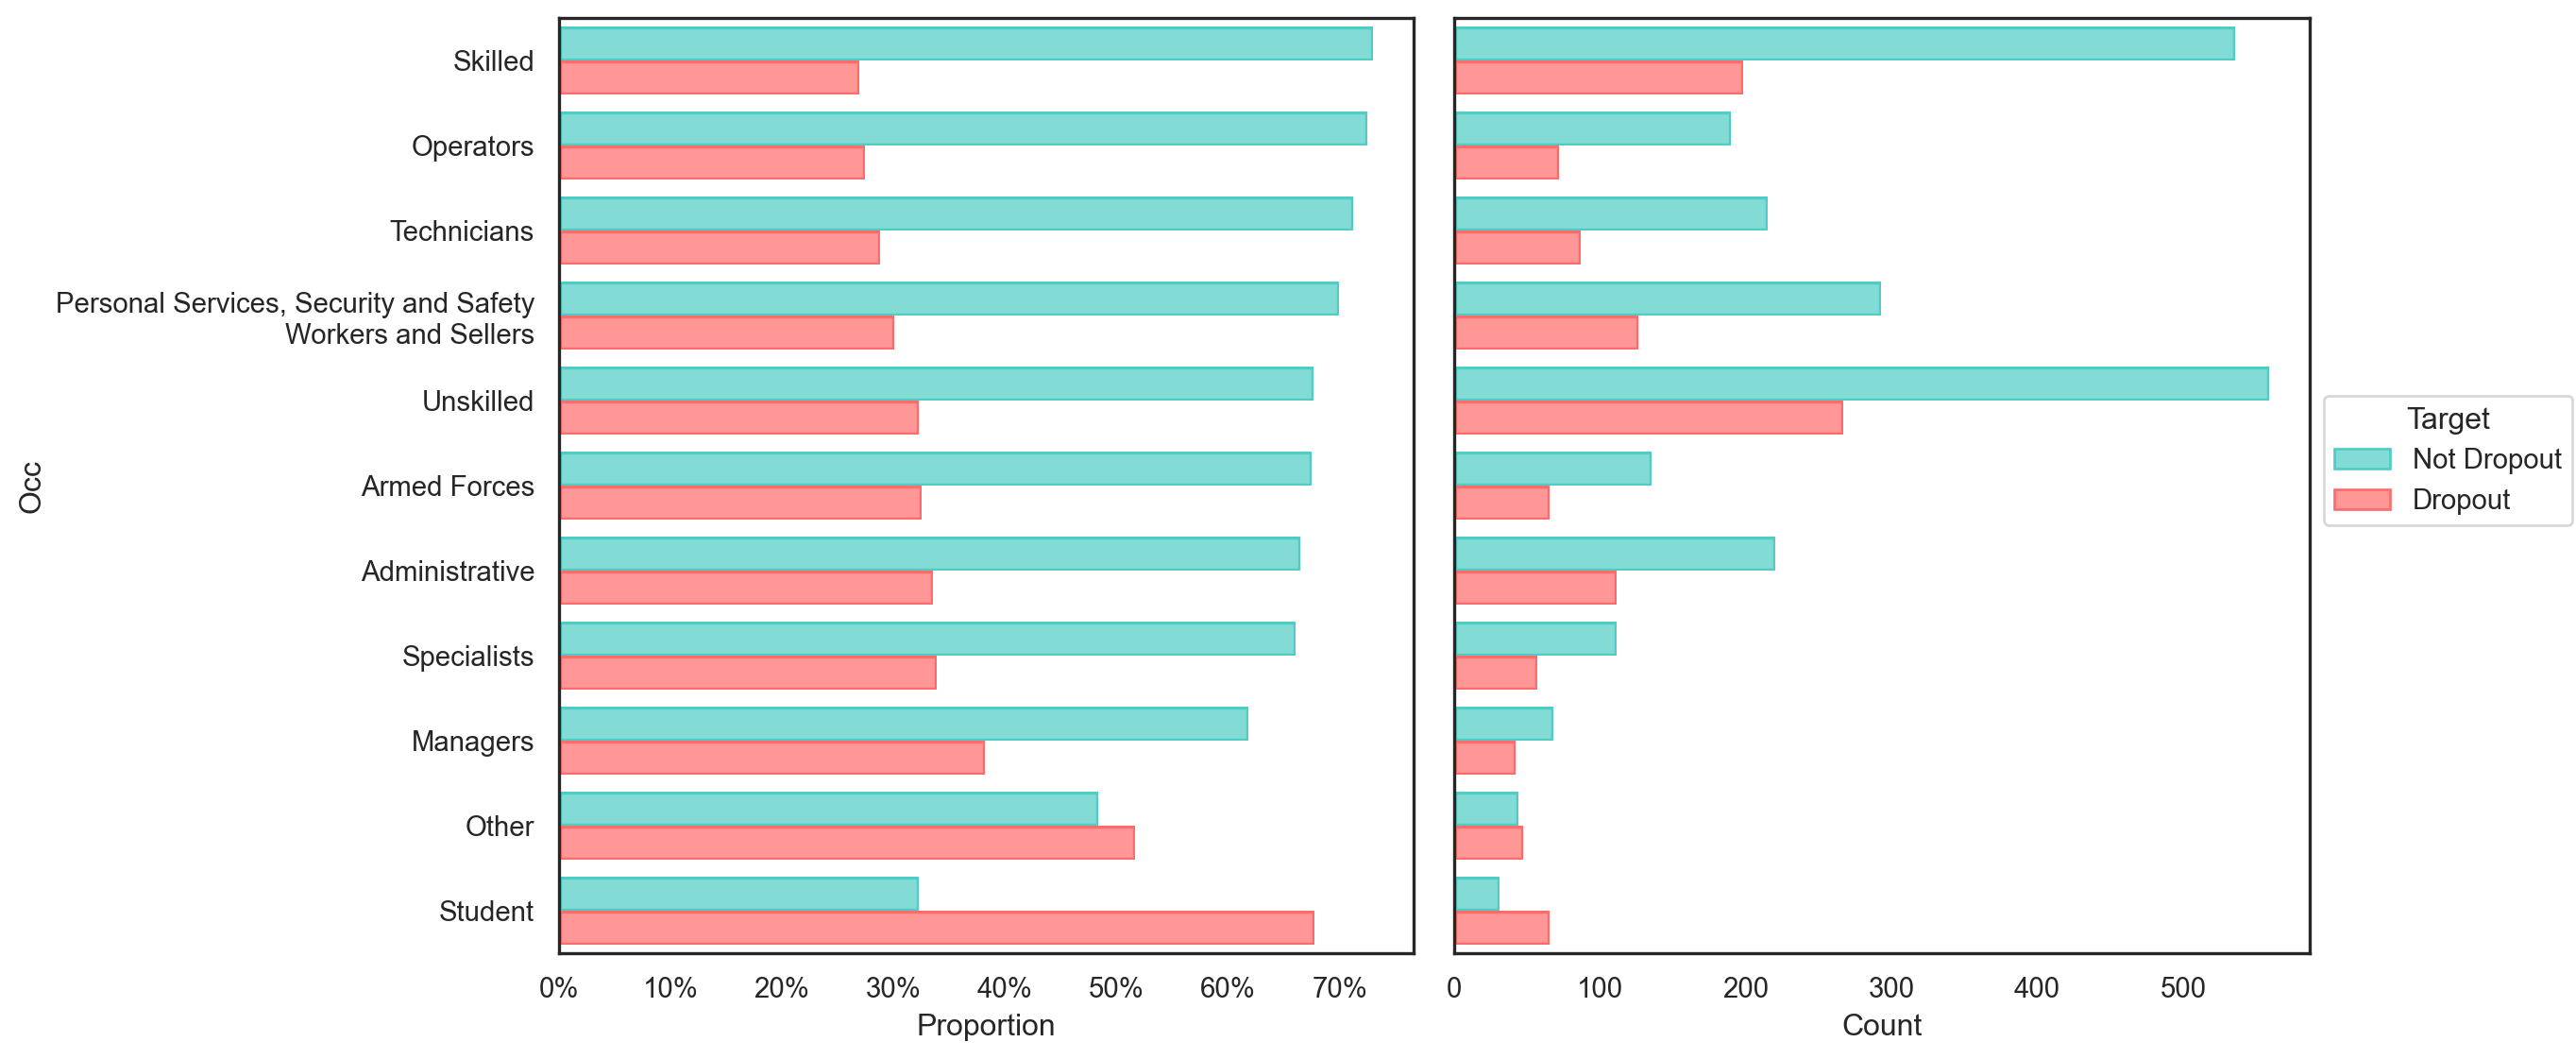

In [49]:
from textwrap import wrap

(
    students.assign(
        occ=lambda x: x.father_occupation.apply(
            lambda y: "\n".join(wrap(y, width=40, expand_tabs=False))
        )
    ).pipe(plot_proportions, "occ")
)

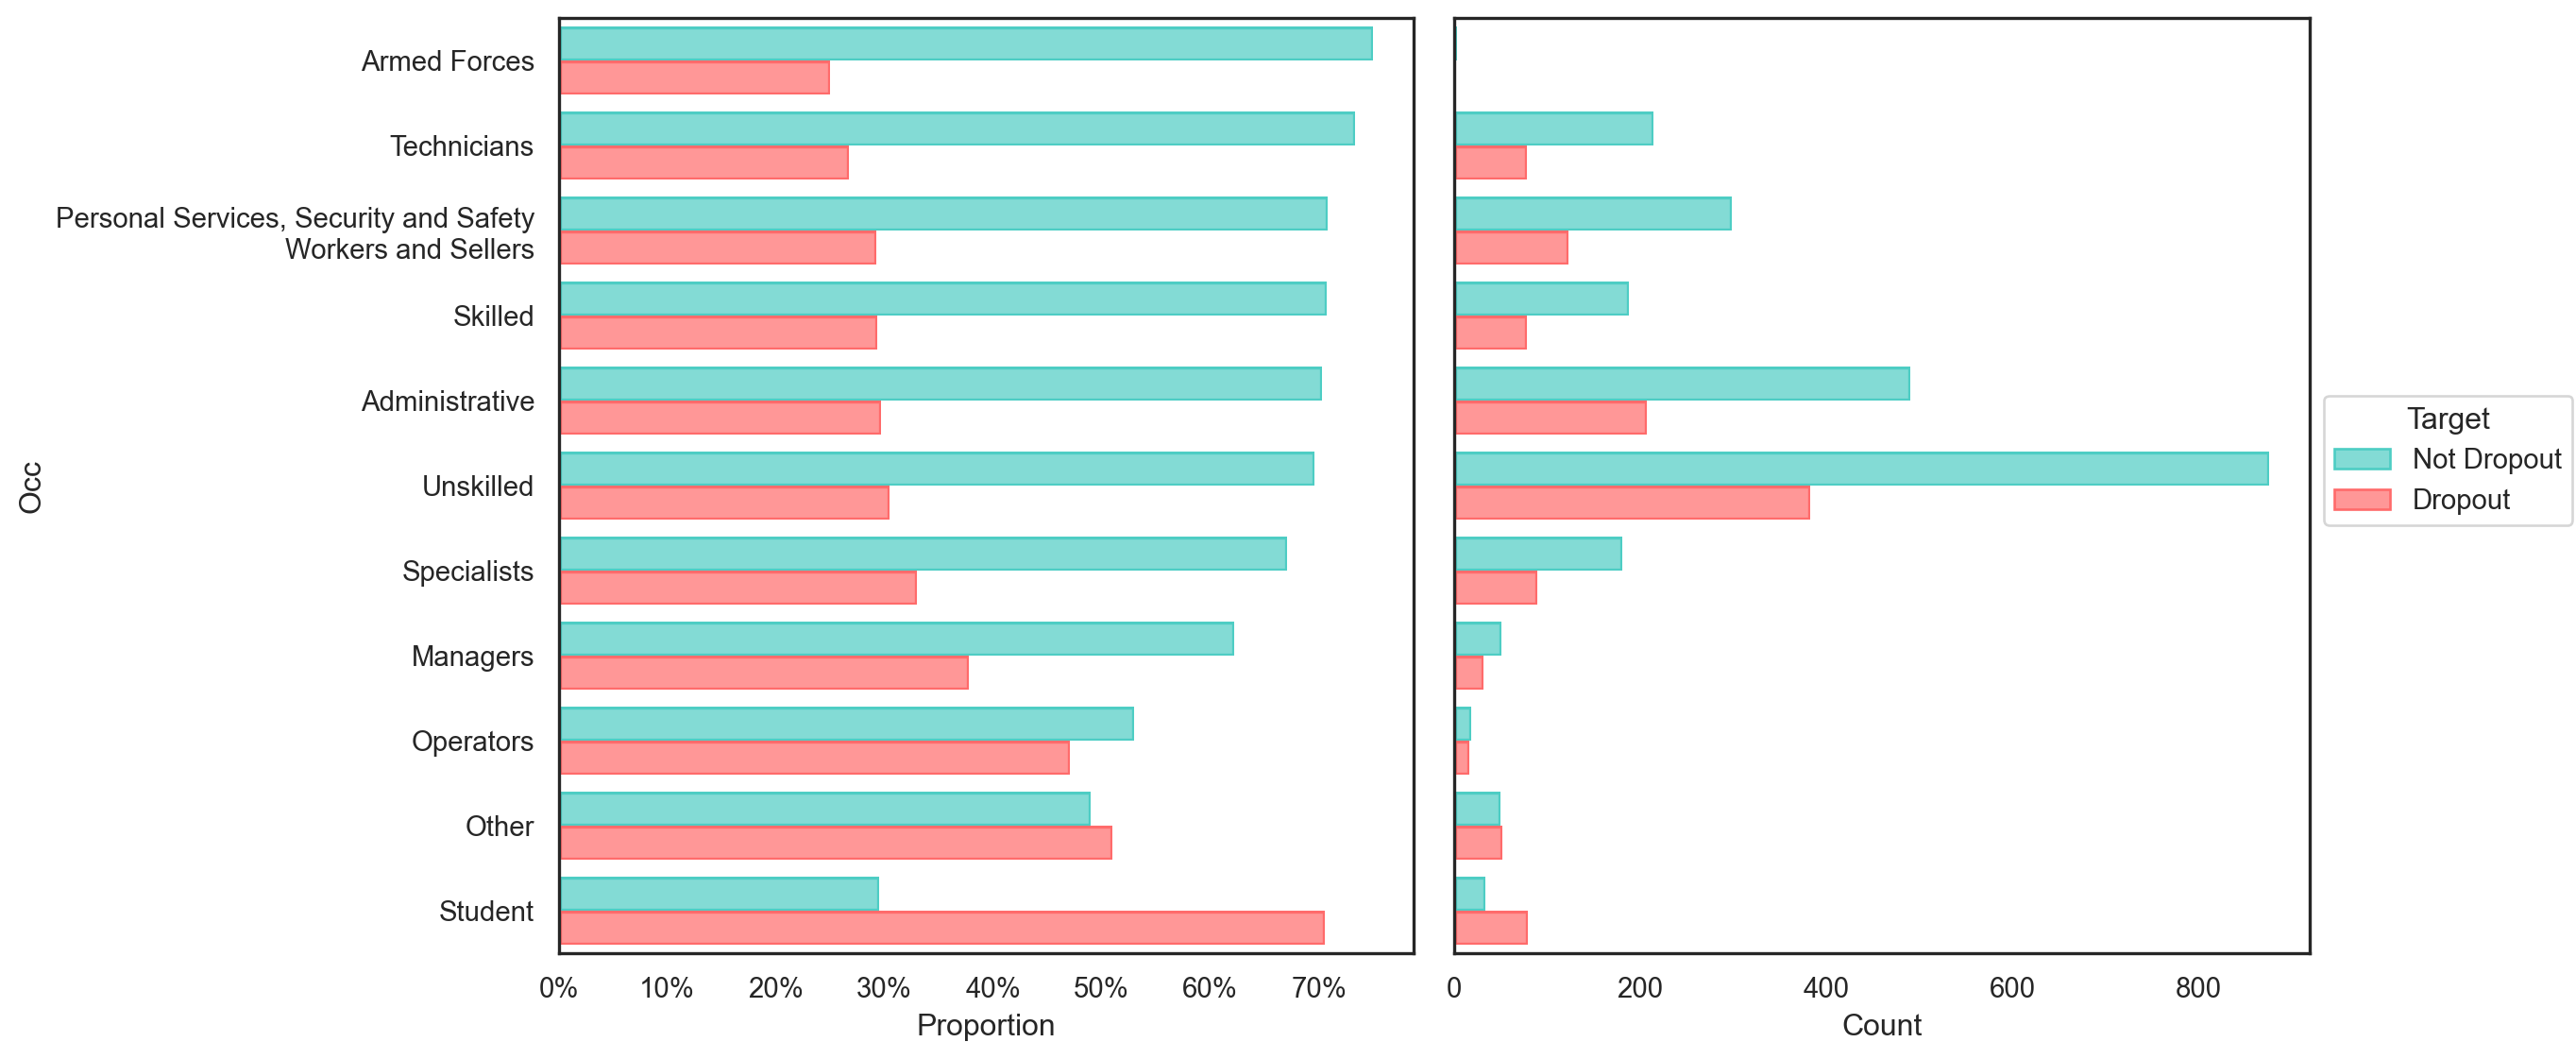

In [50]:
from textwrap import wrap

(
    students.assign(
        occ=lambda x: x.mother_occupation.apply(
            lambda y: "\n".join(wrap(y, width=40, expand_tabs=False))
        )
    ).pipe(plot_proportions, "occ")
)

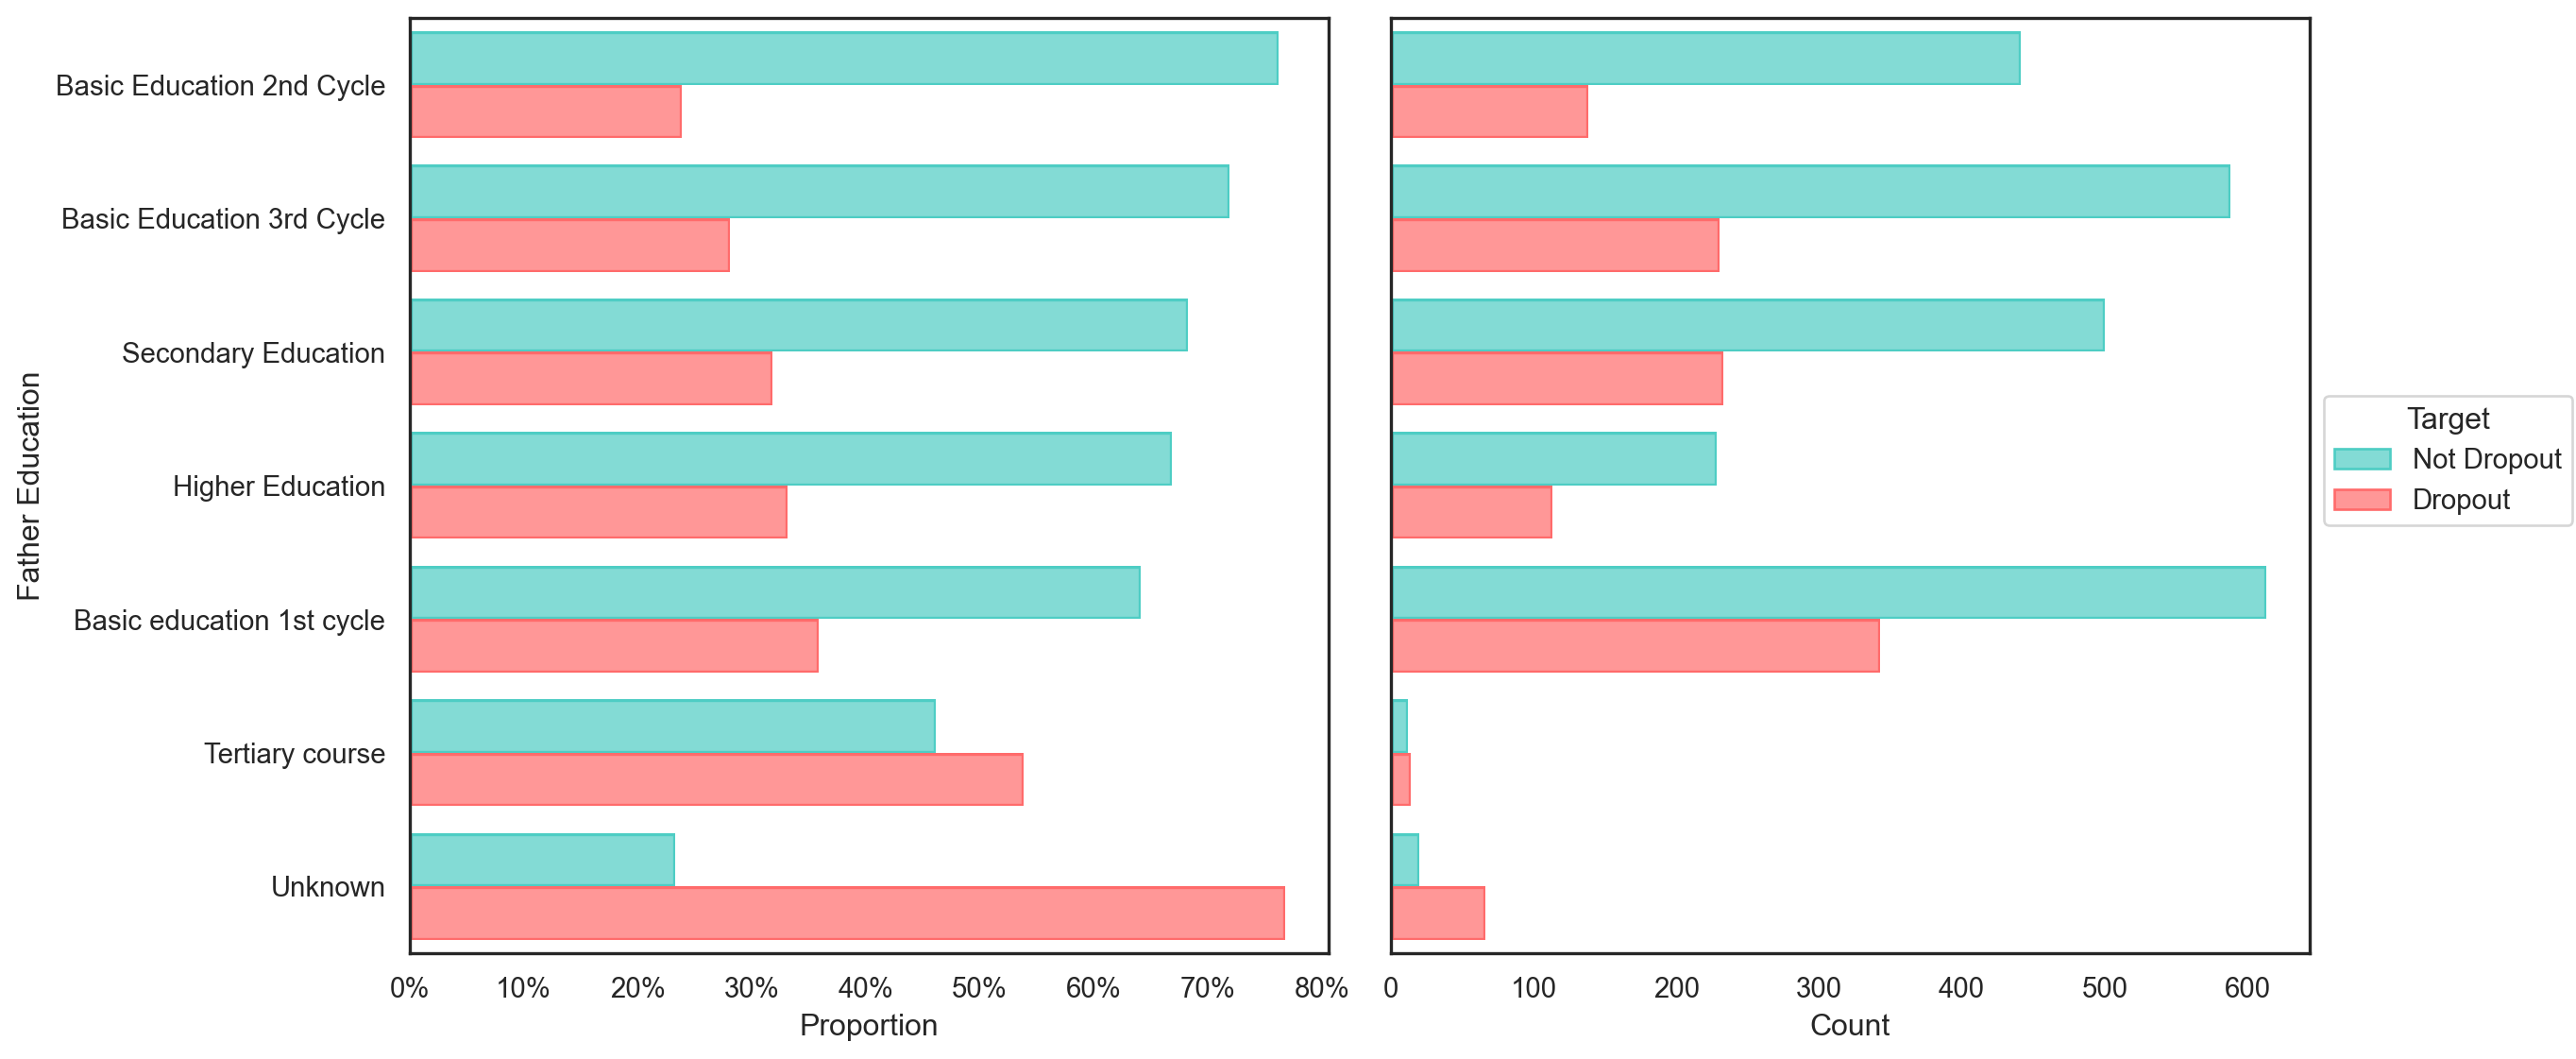

In [51]:
students.pipe(plot_proportions, "father_education")

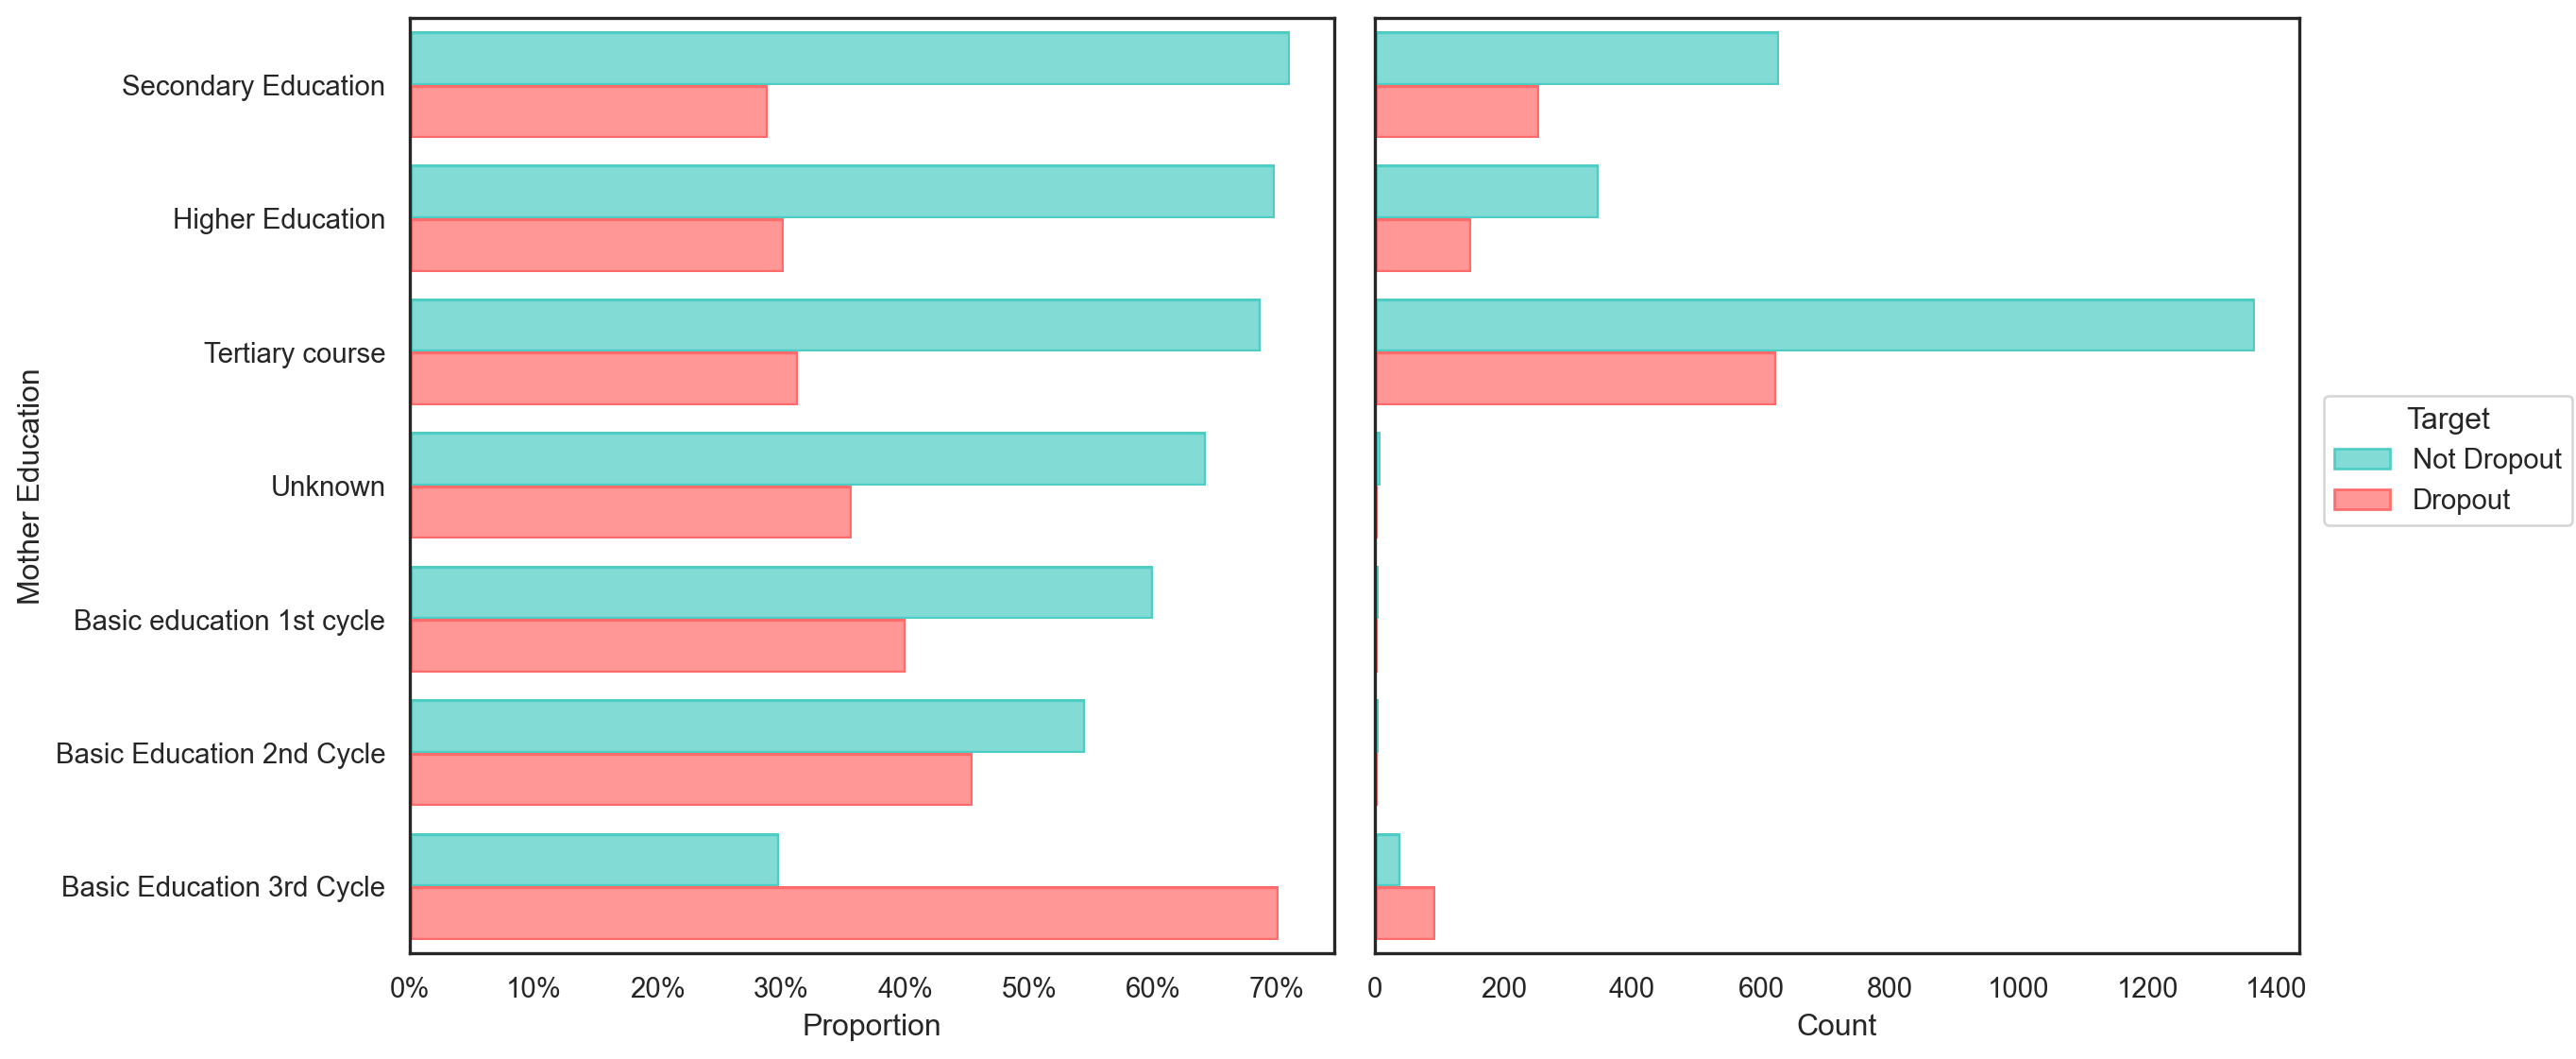

In [52]:
students.pipe(plot_proportions, "mother_education")

Looks like parents studies and jobs influence the students dropout. The problem is that some categories are very rare. I will include these in the model and see if they are good or bad predictors

<Axes: xlabel='age_at_enrollment', ylabel='Density'>

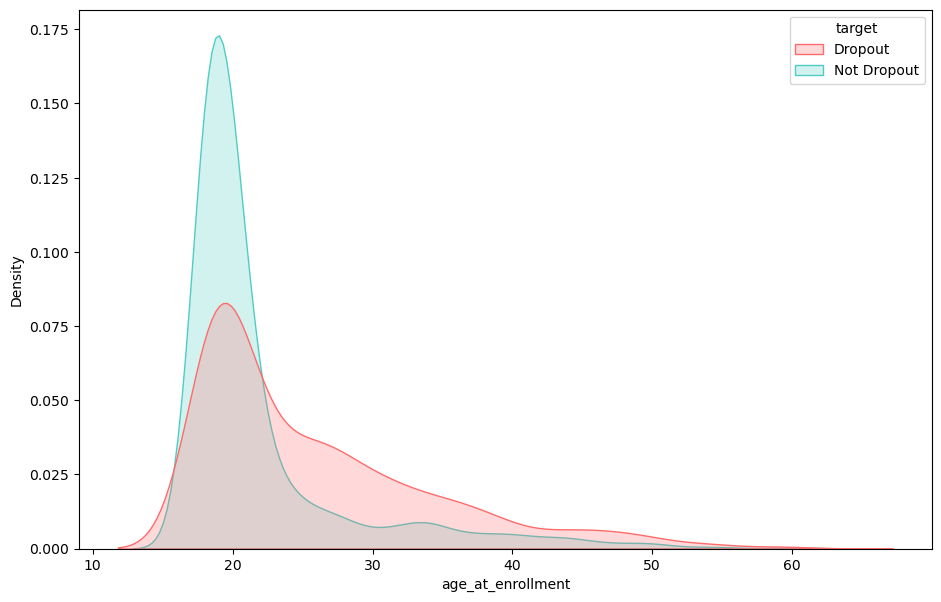

In [53]:
sns.kdeplot(
    students,
    x="age_at_enrollment",
    hue="target",
    fill=True,
    common_norm=False,
    palette=target_palette,
)

<Axes: xlabel='unemployment_rate', ylabel='Count'>

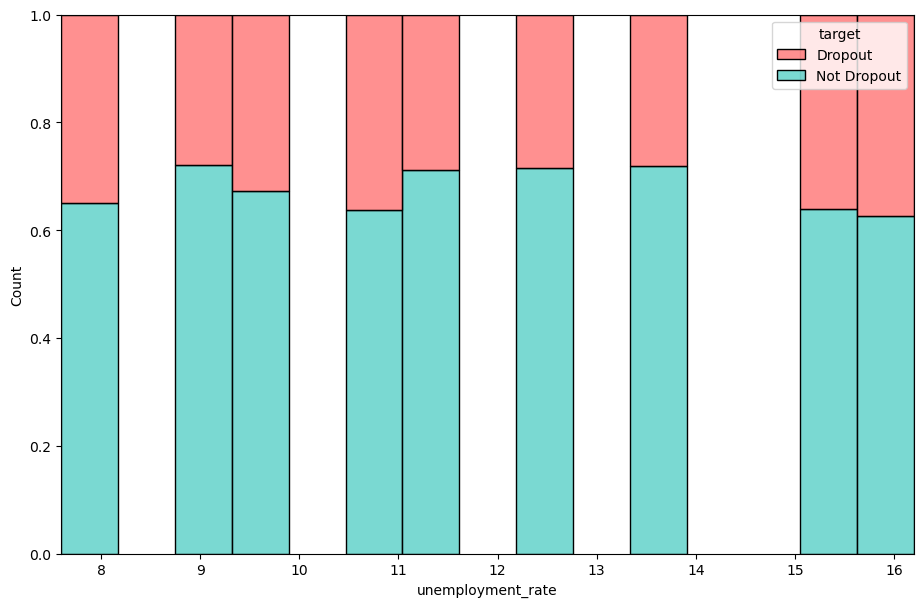

In [54]:
sns.histplot(
    students,
    x="unemployment_rate",
    hue="target",
    stat="count",
    multiple="fill",
    palette=target_palette,
)

<Axes: xlabel='gdp_change', ylabel='Count'>

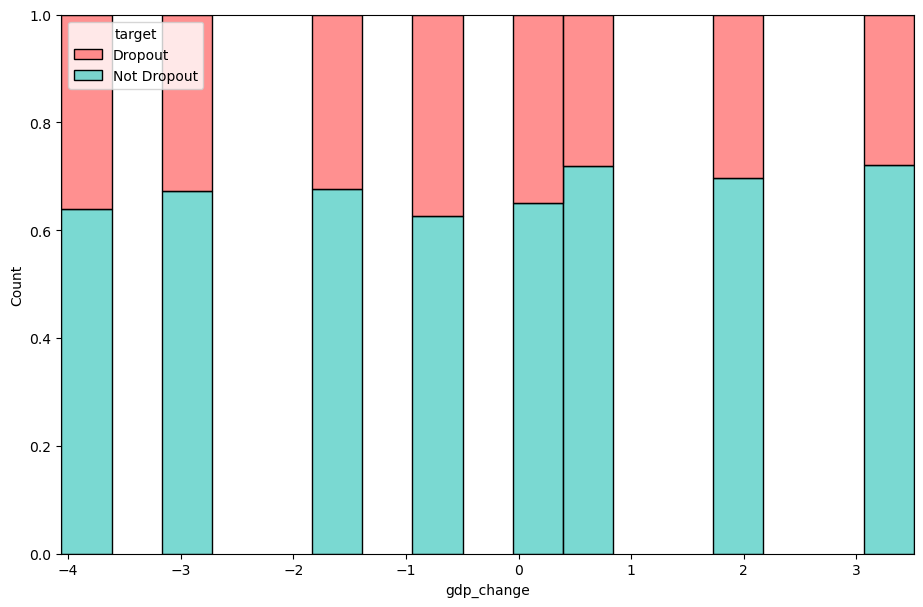

In [55]:
sns.histplot(
    students,
    x="gdp_change",
    hue="target",
    stat="count",
    multiple="fill",
    palette=target_palette,
)

<Axes: xlabel='inflation_rate', ylabel='Count'>

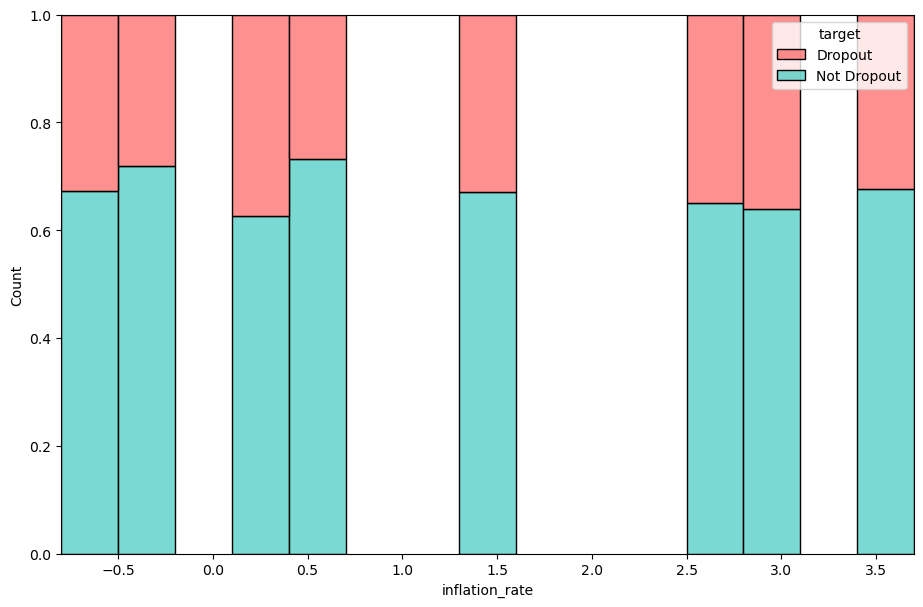

In [56]:
sns.histplot(
    students,
    x="inflation_rate",
    hue="target",
    stat="count",
    multiple="fill",
    palette=target_palette,
)

Probably 'unemployment rate', 'gdp change' and 'inflation rate' are not good predictors of students dropout, we will see what the model says

# Bivariate analysis

In [12]:
academic_columns = students.columns[students.columns.str.contains("first|second")]
students[academic_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
first_sem_credited,3539.0,0.688613,2.288594,0.0,0.00,0.000000,0.00000,20.000000
first_sem_enrolled,3539.0,6.238203,2.433641,0.0,5.00,6.000000,7.00000,26.000000
first_sem_evaluations,3539.0,8.238485,4.155428,0.0,6.00,8.000000,10.00000,45.000000
first_sem_approved,3539.0,4.677310,3.057832,0.0,3.00,5.000000,6.00000,26.000000
first_sem_grade,3539.0,10.616223,4.882002,0.0,11.00,12.333333,13.40000,18.000000
first_sem_without_evaluations,3539.0,0.137609,0.684972,0.0,0.00,0.000000,0.00000,12.000000
second_sem_credited,3539.0,0.526137,1.869872,0.0,0.00,0.000000,0.00000,19.000000
second_sem_enrolled,3539.0,6.203165,2.163140,0.0,5.00,6.000000,7.00000,23.000000
second_sem_evaluations,3539.0,8.033908,3.922148,0.0,6.00,8.000000,10.00000,33.000000
second_sem_approved,3539.0,4.413111,2.993021,0.0,2.00,5.000000,6.00000,20.000000


The "without_evaluations" have a small deviation, and most of its values are zero. Is it worth to keep this variable?

<Axes: xlabel='first_sem_without_evaluations', ylabel='Density'>

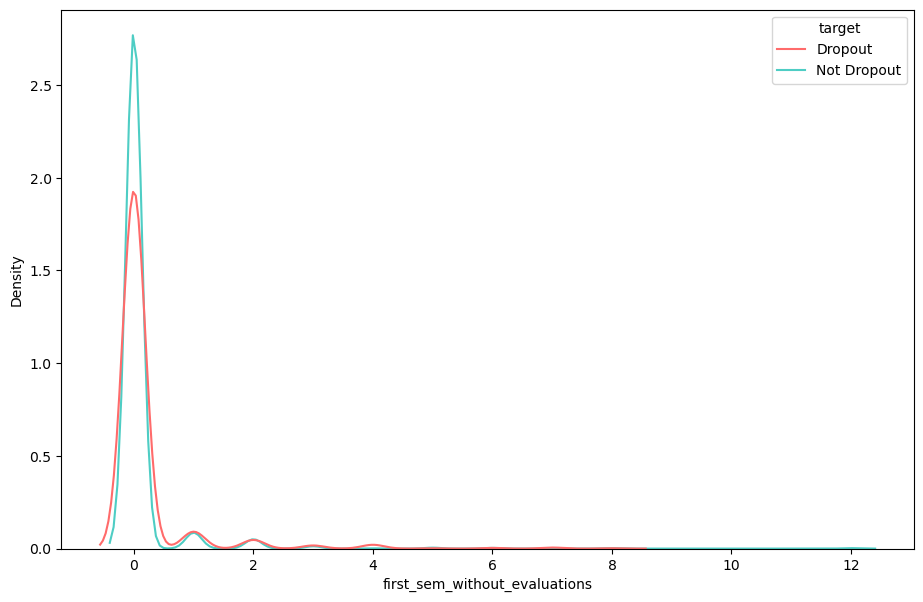

In [58]:
sns.kdeplot(
    students,
    x="first_sem_without_evaluations",
    hue="target",
    palette=target_palette,
    common_norm=False,
)

In [60]:
model = smf.logit(
    "dropout ~ first_sem_without_evaluations",
    data=students.assign(target=lambda x: (x.target == "Graduate").astype(int)),
).fit()

Optimization terminated successfully.
         Current function value: 0.626529
         Iterations 4


In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                dropout   No. Observations:                 3539
Model:                          Logit   Df Residuals:                     3537
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Jul 2023   Pseudo R-squ.:                0.002070
Time:                        22:30:34   Log-Likelihood:                -2217.3
converged:                       True   LL-Null:                       -2221.9
Covariance Type:            nonrobust   LLR p-value:                  0.002425
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.7702      0.037    -20.907      0.000      -0.842      -0.698
first_sem_without_evaluations     0.1529      0.051      3.005      0.003       0.053       0.253
=================================================================================================
"""

In [ ]:
model = smf.logit(
    "target ~ first_sem_without_evaluations",
    data=students.assign(
        target=lambda x: (x.target == "Graduate").astype(int),
        first_sem_without_evaluations=lambda x: x.first_sem_without_evaluations == 0,
    ),
).fit()

Optimization terminated successfully.
         Current function value: 0.689044
         Iterations 4


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 3539
Model:                          Logit   Df Residuals:                     3537
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                0.005919
Time:                        17:26:58   Log-Likelihood:                -2438.5
converged:                       True   LL-Null:                       -2453.0
Covariance Type:            nonrobust   LLR p-value:                 7.102e-08
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -0.6870      0.135     -5.075      0.000      -0.952      -0.422
first_sem_without_evaluations[T.True]     0.7332      0.140      5.244      0.000       0.459       1.007
=========================================================================================================
"""

These variables may work better as boolean predictors: has_units_without_evals

In [63]:
first_semester_evals = students[
    ["first_sem_evaluations", "first_sem_approved", "target"]
]
first_semester_evals.columns = ["evaluations", "approved", "target"]

In [64]:
all(
    first_semester_evals.assign(correct=lambda x: x.evaluations >= x.approved)[
        "correct"
    ]
)
# Checking if the number of evaluations is always greater or equal to the number of approved evaluations, it checks

True

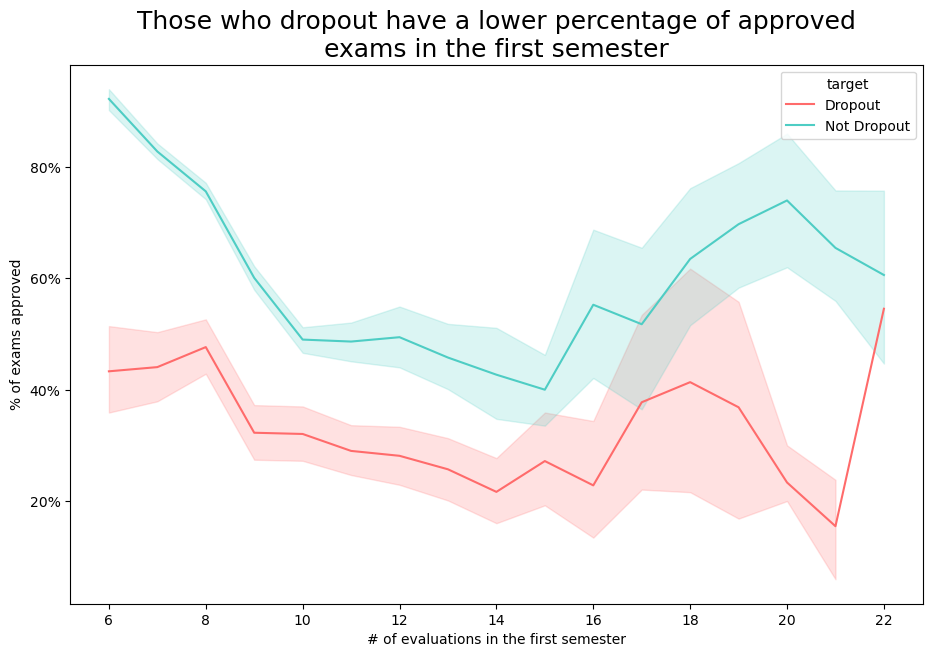

In [74]:
first_semester_evals = first_semester_evals.assign(
    pct_approved=lambda x: x.approved / x.evaluations
).query("evaluations > 5")
sns.lineplot(
    first_semester_evals.query("evaluations <= 22"),
    x="evaluations",
    y="pct_approved",
    hue="target",
    palette=target_palette,
)
plt.title(
    "Those who dropout have a lower percentage of approved\nexams in the first semester",
    fontsize=18,
)
plt.ylabel("% of exams approved")
plt.xlabel("# of evaluations in the first semester")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

This one looks like a really good predictor, there is a clear difference between students who graduate on time and the others, and this is just information from the first semester of the course! Lets check the second semester

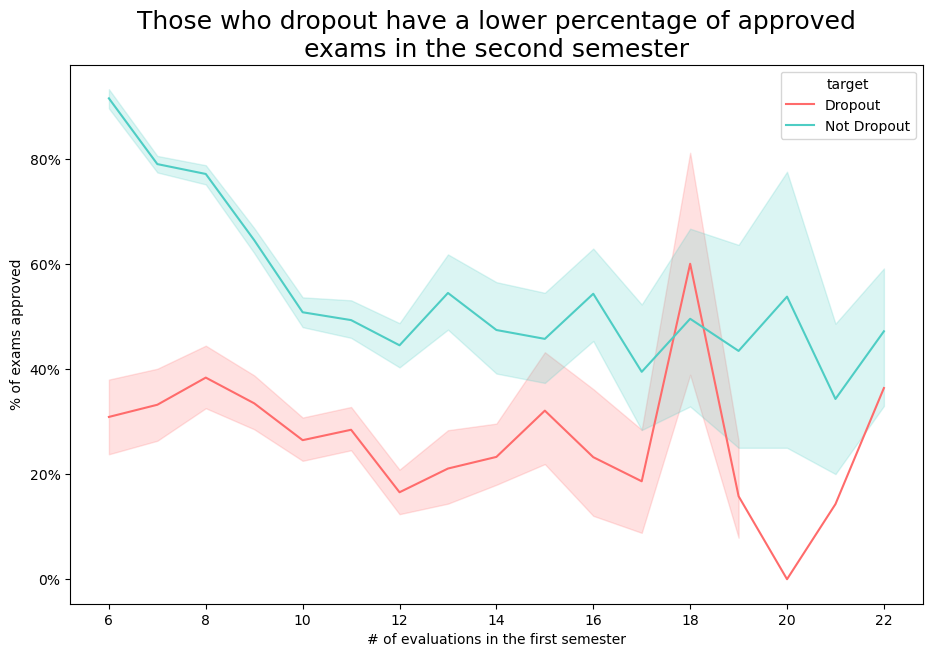

In [73]:
second_semester_evals = students[
    ["second_sem_evaluations", "second_sem_approved", "target"]
]
second_semester_evals.columns = ["evaluations", "approved", "target"]
second_semester_evals = second_semester_evals.assign(
    pct_approved=lambda x: x.approved / x.evaluations
).query("evaluations > 5")
sns.lineplot(
    second_semester_evals.query("evaluations <= 22"),
    x="evaluations",
    y="pct_approved",
    hue="target",
    palette=target_palette,
)
plt.title(
    "Those who dropout have a lower percentage of approved\nexams in the second semester",
    fontsize=18,
)
plt.ylabel("% of exams approved")
plt.xlabel("# of evaluations in the first semester")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Again this is a good predictor. Probably I should do some dimensionality reductions or clustering with these academic data variables, because they seem to be very correlated with the output

## Correlation analysis

Before doing the correlation analysis, I need to convert all my categorical variables to numerical, since this is the only type accepted by the `pandas.corr()` function. To do this, I will apply the `pandas.factorize()` function in all the non numerical columns 

In [82]:
students_nums = pd.concat(
    [
        students.select_dtypes("number"),
        students.select_dtypes(exclude="number").apply(lambda x: pd.factorize(x)[0]),
    ],
    axis=1,
)
students_nums = students_nums.drop(columns="target")

<Axes: >

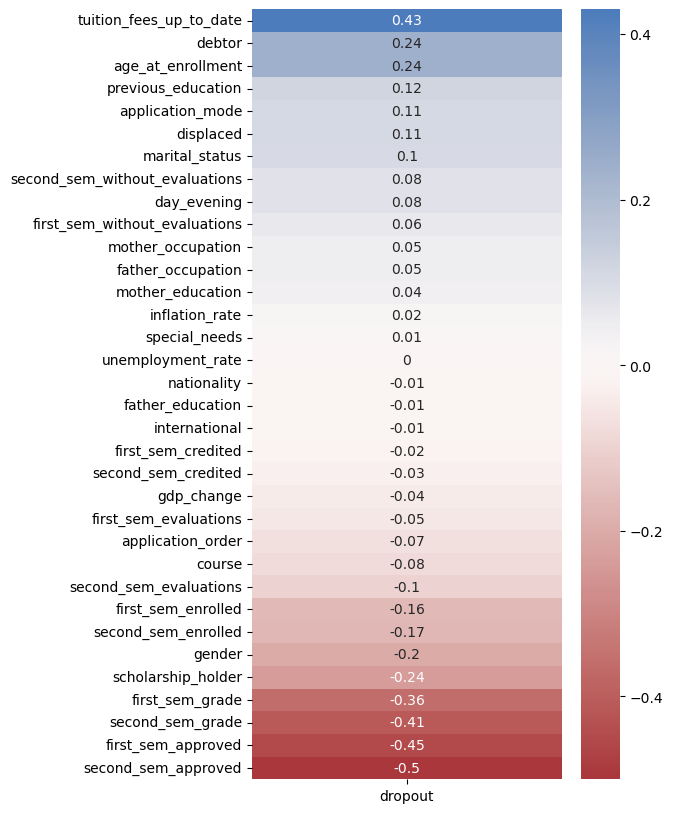

In [83]:
plt.figure(figsize=(5, 10))
corr_mat = students_nums.corr(method="kendall").round(2)
sns.heatmap(
    corr_mat[["dropout"]].sort_values("dropout", ascending=False).drop(index="dropout"),
    cmap="vlag_r",
    annot=True,
    center=0,
)

<Axes: >

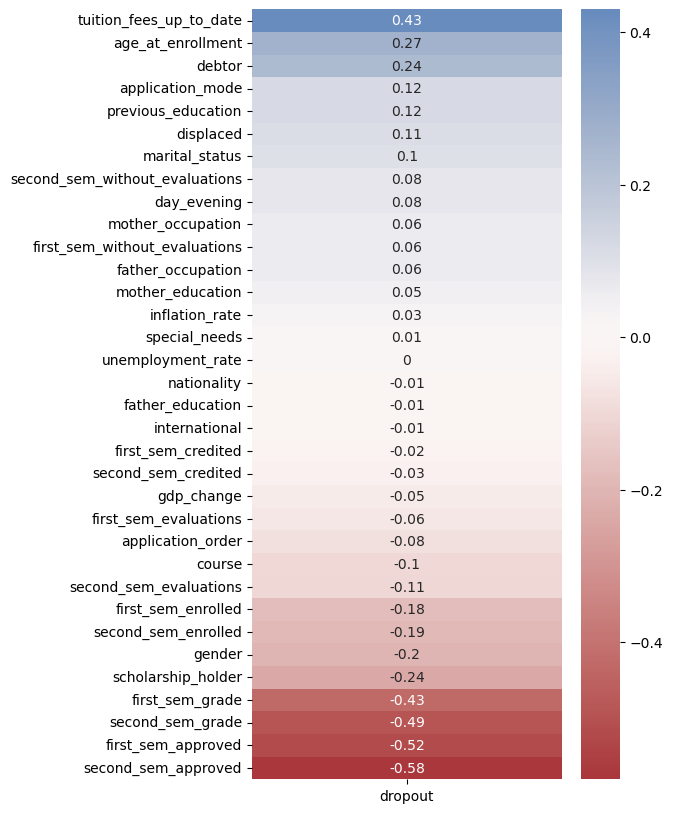

In [84]:
plt.figure(figsize=(5, 10))
corr_mat = students_nums.corr(method="spearman").round(2)
sns.heatmap(
    corr_mat[["dropout"]].sort_values("dropout", ascending=False).drop(index="dropout"),
    cmap="vlag_r",
    annot=True,
    center=0,
)

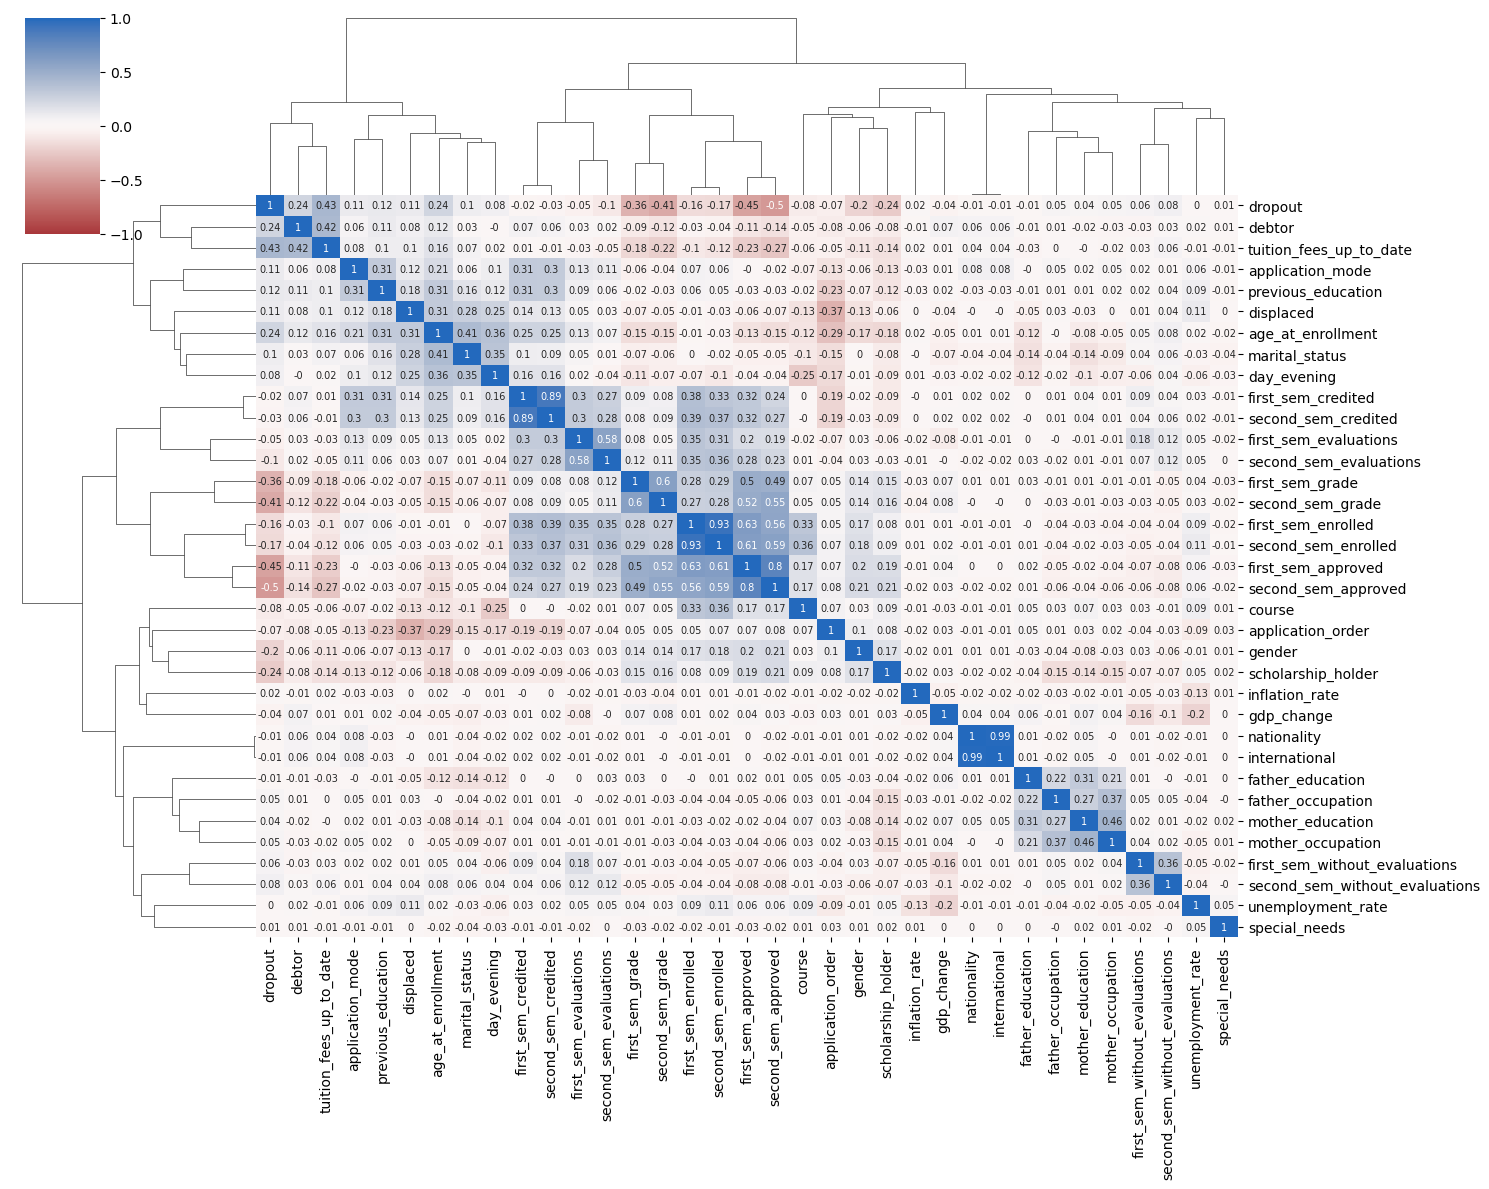

In [85]:
g = sns.clustermap(
    students_nums.corr(method="kendall").round(2),
    method="complete",
    cmap="vlag_r",
    annot=True,
    annot_kws={"size": 7},
    vmin=-1,
    vmax=1,
    figsize=(15, 12),
);

Looks like there are some clusters in our data, the biggest one being the academic data variables. I will try to make a umap transformation on these variables and see how do they relate to the target

## Dimensionality reduction on academic data

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance.

In [15]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP

scaler = StandardScaler()
students_academic = students[academic_columns].copy()
students_academic_sc = scaler.fit_transform(students_academic)

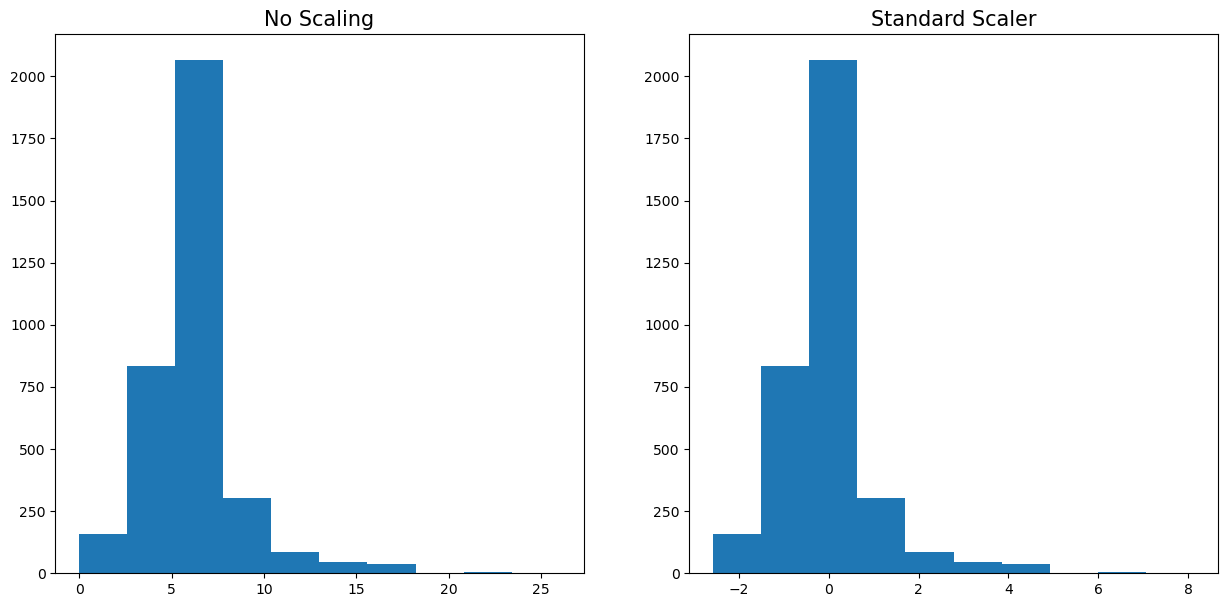

In [14]:
column_number = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(students_academic.iloc[:, column_number])
ax[0].set_title("No Scaling", fontsize=15)
ax[1].hist(students_academic_sc[:, column_number])
ax[1].set_title("Standard Scaler", fontsize=15)
plt.show()

In [16]:
embedding = UMAP().fit_transform(students_academic_sc, students['dropout'])

<Axes: >

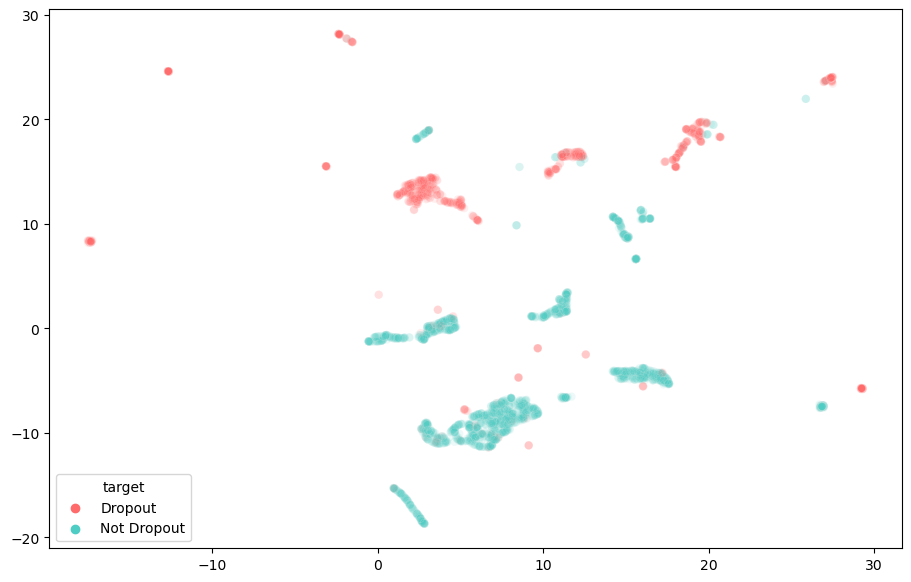

In [17]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=students["target"],
    palette=target_palette,
    alpha=0.1,
)

### PCA on academic data

In [96]:
from sklearn.decomposition import PCA

pca = PCA()
pca_rs = pca.fit_transform(students_academic_robust_sc)
pca_df = pd.DataFrame(pca_rs, columns=[f"PC{i + 1}" for i in range(pca_rs.shape[1])])

<Axes: xlabel='PC1', ylabel='PC2'>

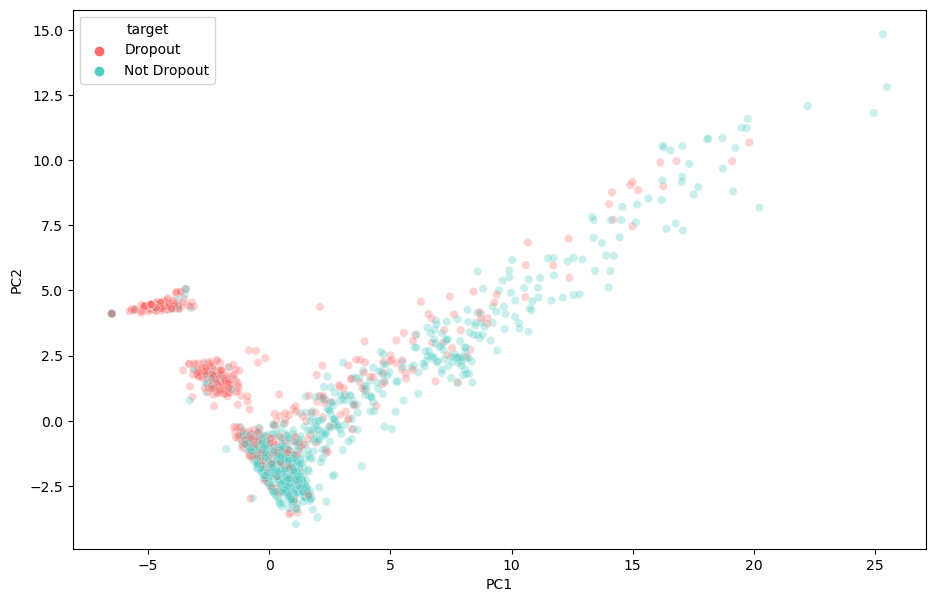

In [97]:
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=students["target"],
    palette=target_palette,
    alpha=0.3,
)

We can see a that PCA does a worst job at dividing the categories than UMAP. UMAP has the advantage of using the target to do supervised dimensionality reduction.

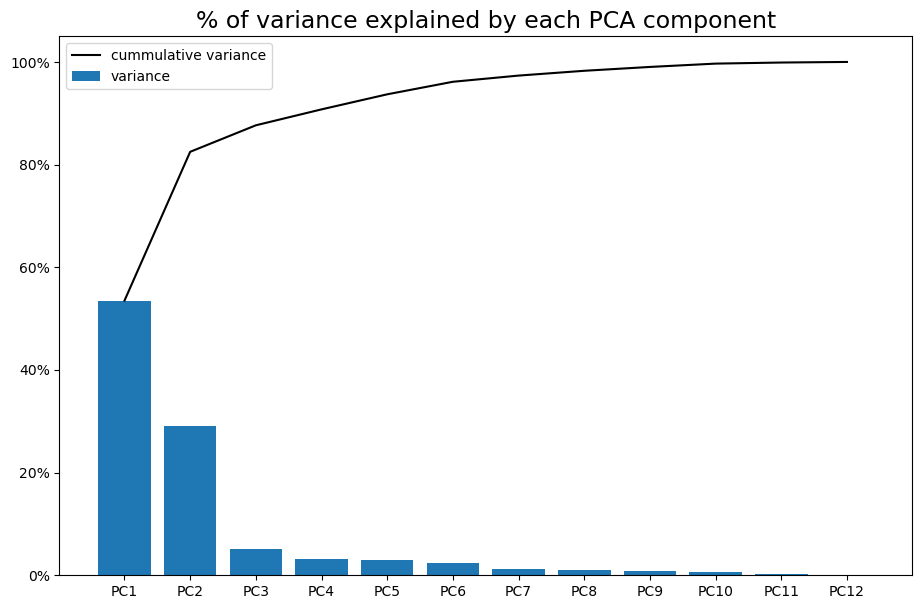

In [98]:
plt.bar(x=range(pca_rs.shape[1]), height=pca.explained_variance_ratio_)
plt.plot(range(pca_rs.shape[1]), pca.explained_variance_ratio_.cumsum(), c="black")
plt.legend(["cummulative variance", "variance"])
plt.xticks(
    ticks=range(pca_rs.shape[1]), labels=[f"PC{i + 1}" for i in range(pca_rs.shape[1])]
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("% of variance explained by each PCA component", fontsize=17)
plt.show()

In [99]:
pca_comps = pd.DataFrame(
    pca.components_, index=pca_df.columns, columns=academic_columns
).reset_index(names="component")

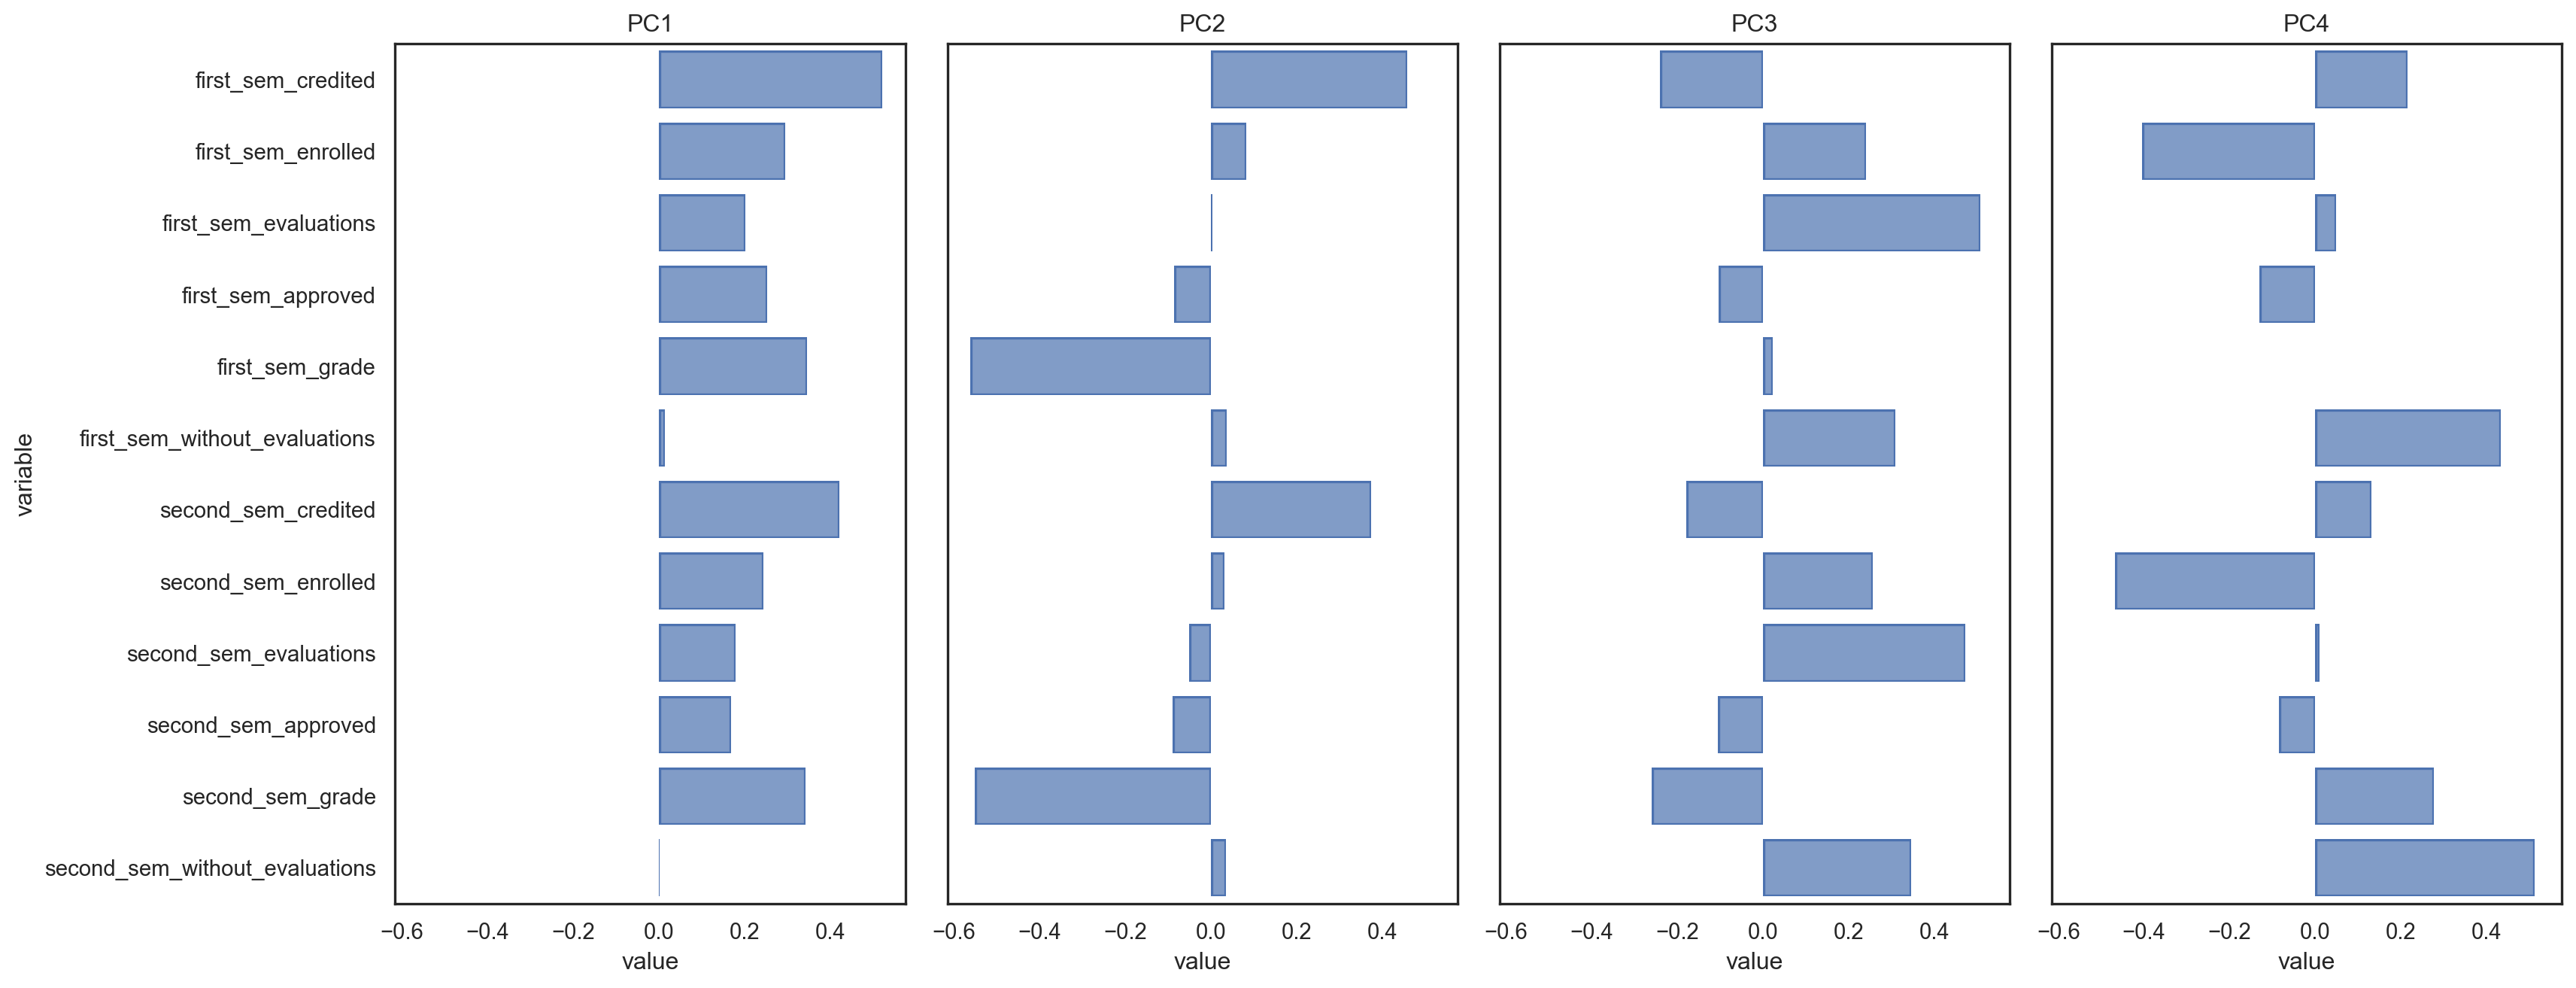

In [100]:
pca_comps_long = pca_comps.melt(id_vars="component").query(
    "component.isin(['PC1','PC2','PC3','PC4'])"
)

(
    so.Plot(pca_comps_long, "value", "variable")
    .add(so.Bar())
    .facet("component", wrap=4)
    .layout(size=(18, 7))
    .theme({**axes_style("white")})
)

Most of the variance in the PCA analysis is explained by the first 3 components. I will try to extend the UMAP analysis to 3 components also to see if there is and improvement on the division of the categories

In [18]:
embedding_3d = UMAP(n_components=3, n_neighbors=10).fit_transform(
    students_academic_sc, students['dropout']
)
embedding_3d_df = pd.DataFrame(embedding_3d, columns=[f"UMAP{i}" for i in range(1, 4)])

In [19]:
import plotly.express as px

fig = px.scatter_3d(
    embedding_3d_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    color=students["target"],
    title="Students academic variables - UMAP",
    height=800,
    width=1100,
    color_discrete_map=target_palette,
    opacity=0.2,
)
fig.show()

From the visual analysis, the 3 components UMAP is doing better than the 2 components UMAP to discriminate the different categories. If I will use this as a preprocessing step in the classification model, I will have to tune this hyperparameter

# Questions

### 1.  Why is there a difference between men and women in dropouts? Is it related with the chosen course?

I will compare the dropouts vs non-dropouts

In [20]:
import statsmodels.formula.api as smf

This first model will only include gender as a predictor, to use as a base model for comparison

In [22]:
model = smf.logit("dropout ~ gender", students).fit()
result = pd.concat([model.params, model.conf_int()], axis=1)
result.columns = ["odds ratio", "5%", "95%"]
result = np.exp(result)
p = model.pvalues.map(lambda x: "".join(["*" for t in [0.05, 0.01, 0.001] if x <= t]))
result["p values"] = model.pvalues.round(3).astype(str) + p
result

Optimization terminated successfully.
         Current function value: 0.608045
         Iterations 5


,odds ratio,5%,95%,p values
Intercept,0.337979,0.307664,0.371281,0.0***
gender[T.male],2.414873,2.086217,2.795304,0.0***


Only using gender as a predictor we can see there is a significative difference between men and women in terms of dropout. Men have 2.4 times the odds of women of dropping out their courses

Based on the data, we can expect an increase of 114% to 178% in the odds of dropout for men compared to women

What happens if we include the course in the analysis?

In [23]:
model = smf.logit("dropout ~ gender + course", students).fit()
result = pd.concat([model.params, model.conf_int()], axis=1)
result.columns = ["odds ratio", "5%", "95%"]
result = np.exp(result)
p = model.pvalues.map(lambda x: "".join(["*" for t in [0.05, 0.01, 0.001] if x <= t]))
result["p values"] = model.pvalues.round(3).astype(str) + p
result

Optimization terminated successfully.
         Current function value: 0.584562
         Iterations 6


,odds ratio,5%,95%,p values
Intercept,0.402841,0.298281,0.544054,0.0***
gender[T.male],2.119925,1.797610,2.500032,0.0***
course[T.Agronomy],0.965908,0.629837,1.481302,0.874
course[T.Animation and Multimedia Design],0.851979,0.552220,1.314456,0.469
course[T.Basic Education],1.778661,1.148753,2.753973,0.01**
course[T.Biofuel Production Technologies],2.682494,0.471254,15.269418,0.266
course[T.Communication Design],0.533680,0.342067,0.832628,0.006**
course[T.Equiniculture],2.354194,1.464623,3.784068,0.0***
course[T.Informatics Engineering],1.372109,0.874896,2.151893,0.168
course[T.Journalism and Communication],0.773732,0.521033,1.148988,0.204


When we include the course in the predictors, the odds drop a bit, but there is still a significant difference between the dropouts of men compared to women. What does a data visualization says?

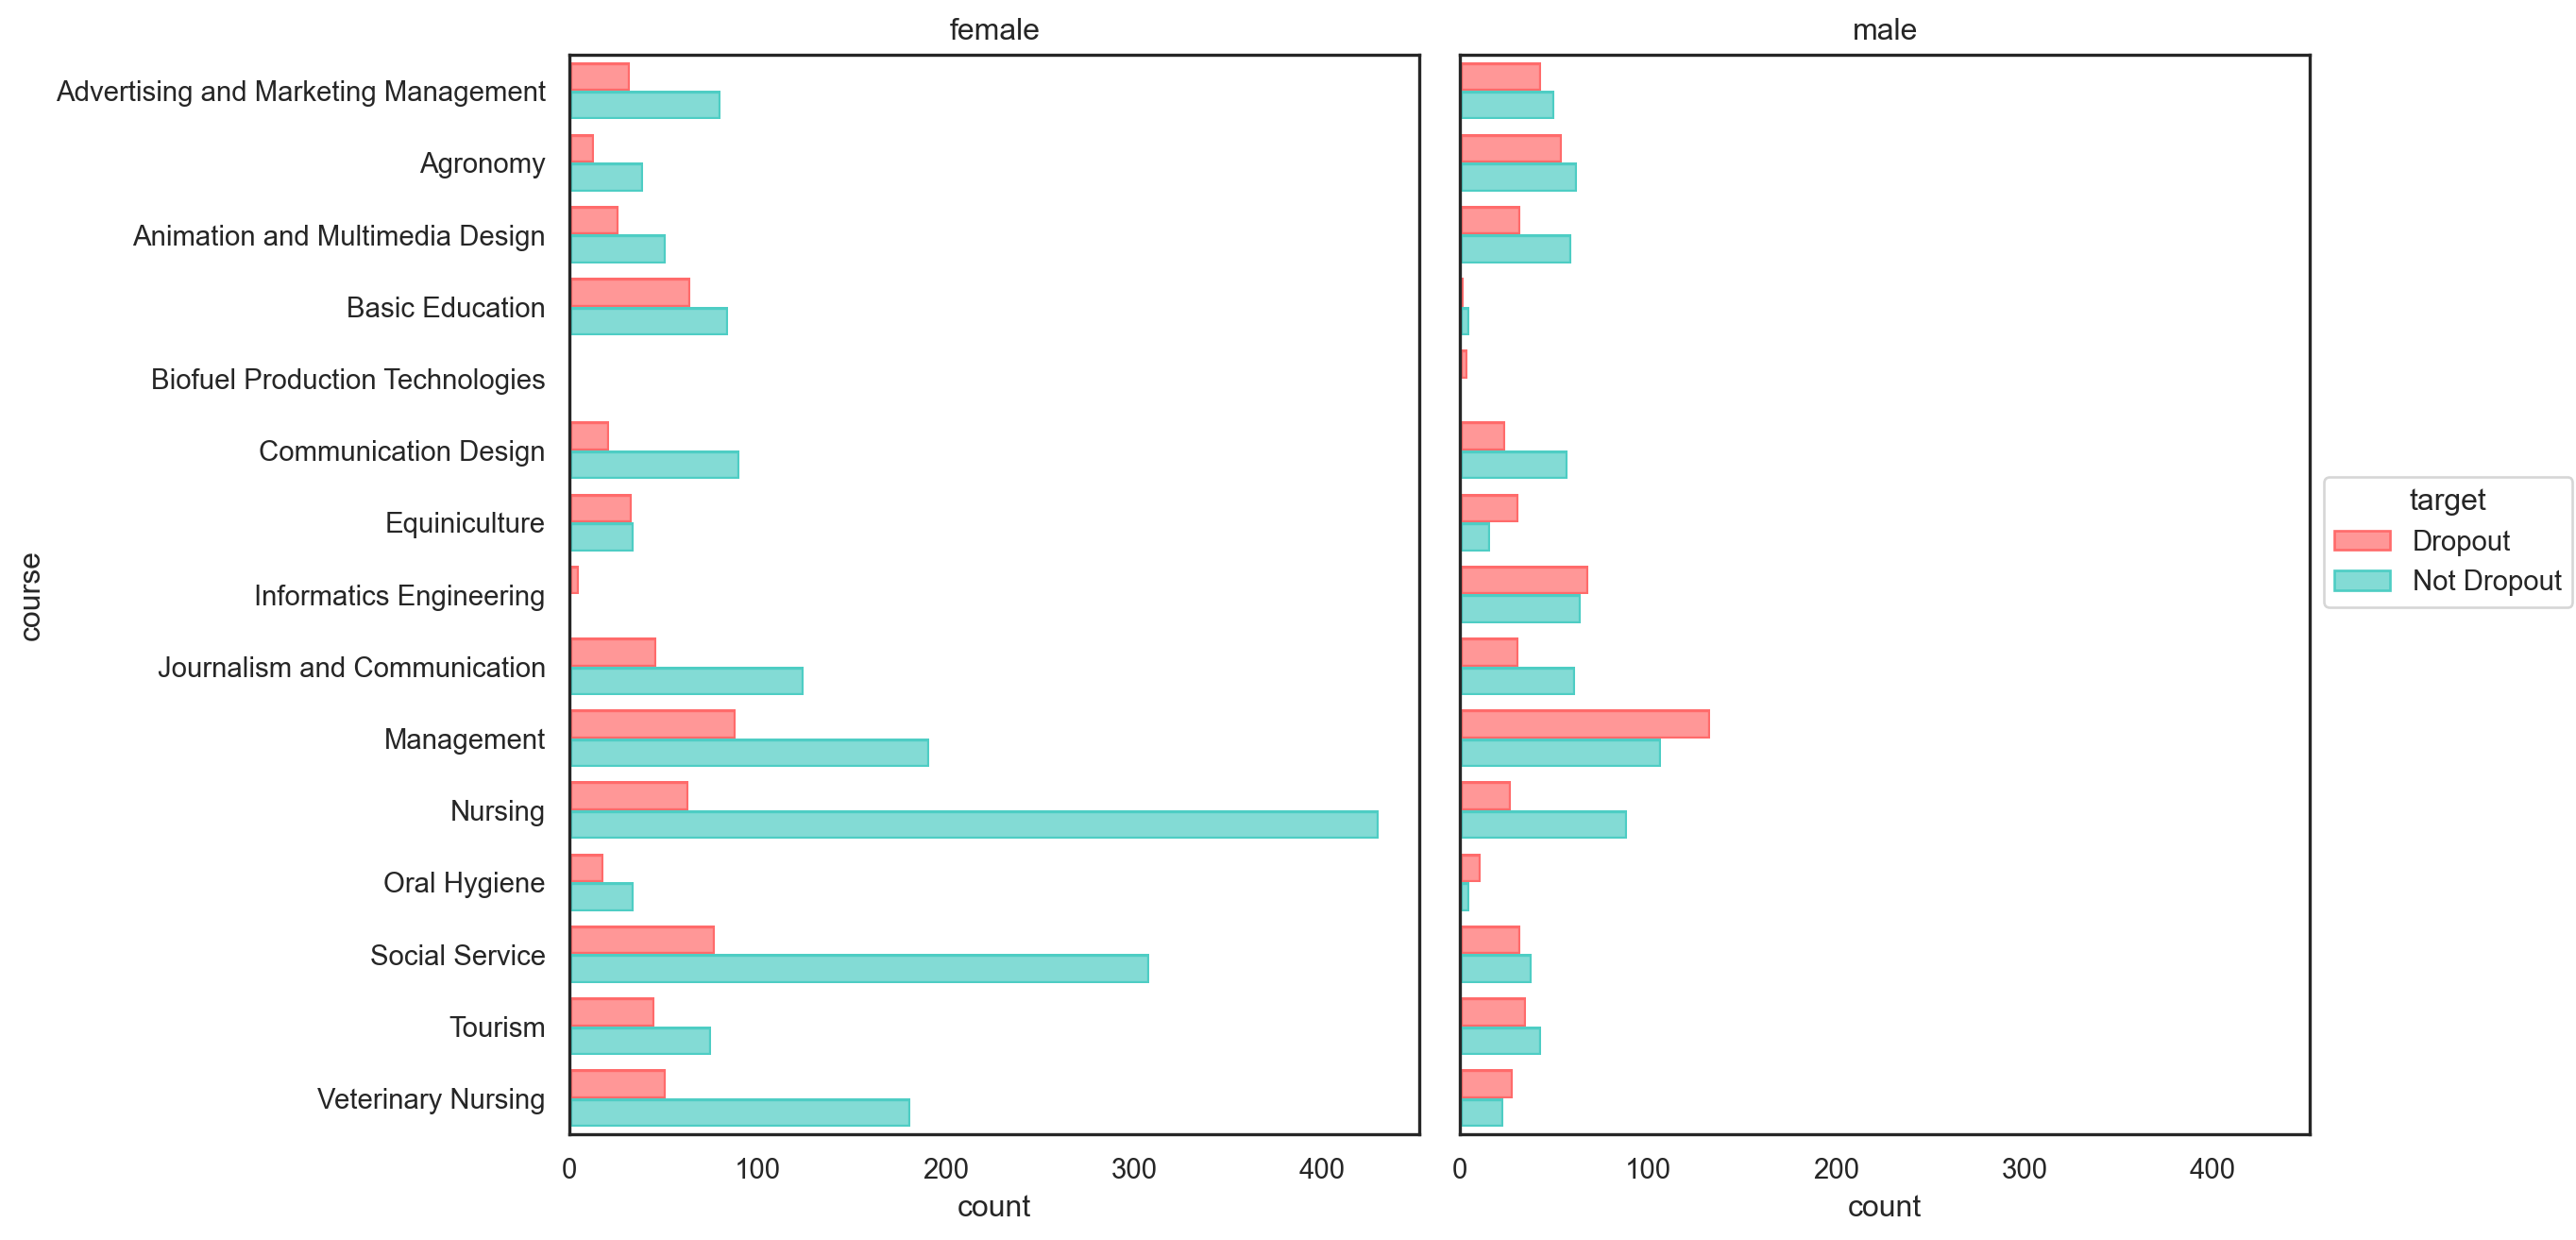

In [25]:
data_filter = (
    students.groupby(["gender", "course"], as_index=False)["target"]
    .value_counts()
)
(
    so.Plot(data_filter, y="course", x="count", color="target")
    .facet("gender")
    .layout(size=(13, 7), engine="tight")
    .add(so.Bar(), so.Dodge())
    .scale(color=so.Nominal(
                values=target_palette,
            ))
    .theme({**axes_style("white")})
)

The visualization confirms what the model say, in almost all the courses women are more likely to not dropout than men

In [26]:
model = smf.logit(
    "dropout ~ gender + course + age_at_enrollment + scholarship_holder + marital_status + day_evening",
    students,
).fit()
result = pd.concat([model.params, model.conf_int()], axis=1)
result.columns = ["odds ratio", "5%", "95%"]
result = np.exp(result)
p = model.pvalues.map(lambda x: "".join(["*" for t in [0.05, 0.01, 0.001] if x <= t]))
result["p values"] = model.pvalues.round(3).astype(str) + p
result

Optimization terminated successfully.
         Current function value: 0.543859
         Iterations 6


,odds ratio,5%,95%,p values
Intercept,0.088742,0.040017,0.196792,0.0***
gender[T.male],1.707484,1.435554,2.030924,0.0***
course[T.Agronomy],0.576205,0.367223,0.904117,0.016*
course[T.Animation and Multimedia Design],0.952843,0.609498,1.489602,0.832
course[T.Basic Education],1.657074,1.049976,2.615195,0.03*
course[T.Biofuel Production Technologies],1.434830,0.245233,8.395026,0.689
course[T.Communication Design],0.553905,0.348968,0.879194,0.012*
course[T.Equiniculture],1.958599,1.201365,3.193126,0.007**
course[T.Informatics Engineering],1.245961,0.780975,1.987798,0.356
course[T.Journalism and Communication],0.849034,0.562168,1.282283,0.437


Considering age of enrollment, course, scholarship holder and marital status predictors, the gender of the student is still a determining factor to predict whether he/she will dropout in the future. The odds of dropout are 1.7 times higher form men than for women. There is another variable that would be interesting to analyse, and that is if the student has a job or not. Unfortunately, that information is not available in this dataset. Another interesting point to note is that those who are scholarship holders are less likely to dropout, which supports what we have seen in the univariate analysis. Also, age of enrollment have statistical significance in this model, implying that older people are a little more likely to dropout. Finally, when all these factors are considered, the time of day variable (day or evening course) has not statistical significance in the dropout probability, which is something we saw it was relevant in the univariate analysis

How does this simple model perform?

Optimization terminated successfully.
         Current function value: 0.554856
         Iterations 6


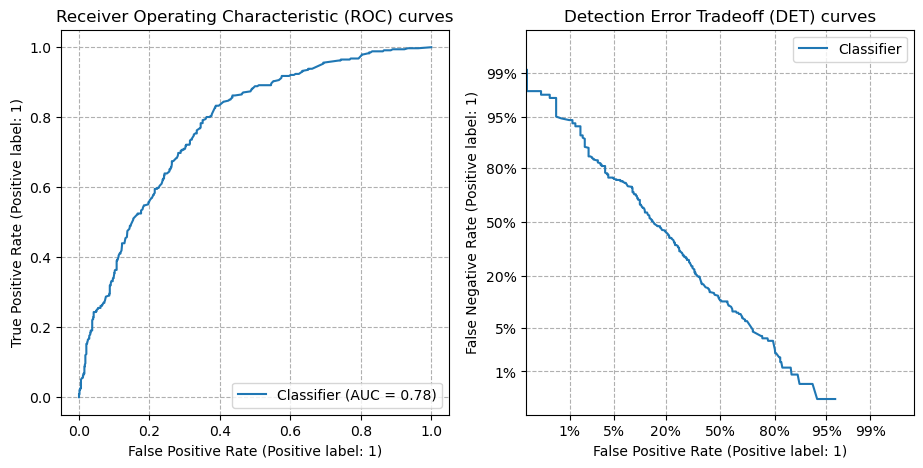

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

train, test = train_test_split(
    students, test_size=0.30, stratify=students["dropout"]
)

model = smf.logit(
    "dropout ~ gender + course + age_at_enrollment + scholarship_holder + marital_status",
    train,
).fit()

predictions = model.predict(test).values

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_predictions(test["dropout"].values, predictions, ax=ax_roc)
DetCurveDisplay.from_predictions(test["dropout"].values, predictions, ax=ax_det)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(test["dropout"].values, predictions > 0.5))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       721
           1       0.62      0.30      0.40       341

    accuracy                           0.71      1062
   macro avg       0.67      0.60      0.61      1062
weighted avg       0.70      0.71      0.68      1062



The estimator has an overall accuracy of 70%, which is not bad considering we are using only a subset of the data, and no feature engineering was applied on it. The dataset is imbalanced, and the recall metric for this estimator is really low, which means it's having trouble predicting the rarest category (dropout) correctly, only detecting around 40% of the cases. When training estimators in the whole data I will have to be aware of this imbalance situation, and use an adequate metric to measure the performance of the classifier.